# 0. Prepare data

In [1]:
import math
import numpy as np
import pandas as pd
from rdkit import Chem
import sys
sys.path.append('Mol2DSimi')
from Similarity import similarity_calculate
from enrichment_factor import Enrichment_Factor
from SimiValid import  similarity_validation

In [2]:
# Active/decoy data
data = pd.read_excel("Data/Apelin_search_standard.xlsx",)
data[['ID', 'Active', 'SMILES']] = data['ID,Active,SMILES'].str.split(',', expand=True)
data['CanonSmiles'] = data['SMILES'].apply(Chem.CanonSmiles)
data['Molecule'] = data['CanonSmiles'].apply(Chem.MolFromSmiles)
data.drop(['ID,Active,SMILES', 'SMILES'], axis =1, inplace = True)
data.head(2)

,ID,Active,CanonSmiles,Molecule
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x7f99a6b6d660>
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x7f99a677f5f0>


In [3]:
# Query data
base_data = pd.read_csv('Data/similarity.csv')
base_data['CanonSmiles'] = base_data['smiles'].apply(Chem.CanonSmiles)
base_data['Molecule'] = base_data['CanonSmiles'].apply(Chem.MolFromSmiles)
base_data.drop(['smiles'], axis = 1, inplace = True)
base_data.head()

,ID,CanonSmiles,Molecule
0,CMF-019,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x7f99a5d019e0>
1,AMG 986,COc1cccc(OC)c1-n1c(NS(=O)(=O)[C@@H](C)[C@H](C)...,<rdkit.Chem.rdchem.Mol object at 0x7f99a5d01c10>
2,BMS-986224,CCOCc1[nH]c(=O)c(-c2nnc(Cc3ccc(Cl)cn3)o2)c(O)c...,<rdkit.Chem.rdchem.Mol object at 0x7f99a5d01c80>


# 1. Similarity Calculation

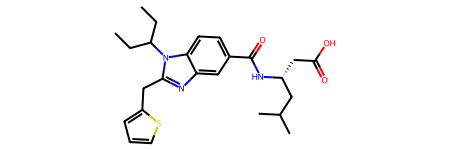

In [4]:
query = []
for _, idx, mol in base_data[["ID", "Molecule"]].itertuples():
    mol.SetProp("_Name", idx)
    query.append(mol)
query[0]

In [5]:
for i in query:
    simi = similarity_calculate(data = data, query= i, smile_col="CanonSmiles", active_col='Active')
    simi.fit()
    simi.plot()

,ID,Active,CanonSmiles,Molecule,ROMol,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp2,tanimoto_ecfp4,tanimoto_ecfp6,...,dice_ecfp2,dice_ecfp4,dice_ecfp6,dice_fcfp2,dice_fcfp4,dice_fcfp6,dice_rdk5,dice_rdk6,dice_rdk7,dice_map4
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x7f99a6b6d660>,<rdkit.Chem.rdchem.Mol object at 0x7f99a5d015f0>,0.874667,0.859375,0.680851,0.554217,0.441667,...,0.810127,0.713178,0.612717,0.086957,0.033898,0.025157,0.973214,0.963365,0.952098,0.697479
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x7f99a677f5f0>,<rdkit.Chem.rdchem.Mol object at 0x7f99a77c3040>,0.973837,0.883333,0.790698,0.763889,0.717172,...,0.883117,0.866142,0.835294,0.089552,0.034483,0.051282,0.994325,0.988235,0.982883,0.912376
2,Active_3,1,C[C@@H]1CCCC[C@H]1n1c(Cc2cccs2)nc2cc(C(=O)NC3(...,<rdkit.Chem.rdchem.Mol object at 0x7f99a677f660>,<rdkit.Chem.rdchem.Mol object at 0x7f99a77c30b0>,0.831202,0.803030,0.520000,0.426966,0.341085,...,0.684211,0.598425,0.508671,0.060606,0.017241,0.025157,0.969967,0.954301,0.940227,0.650255
3,Active_4,1,CC[C@H](C)[C@@H](CCC(=O)O)NC(=O)c1ccc2c(c1)nc(...,<rdkit.Chem.rdchem.Mol object at 0x7f99a677f6d0>,<rdkit.Chem.rdchem.Mol object at 0x7f99a77c3120>,0.862434,0.828125,0.632653,0.505747,0.408000,...,0.775000,0.671756,0.579545,0.085714,0.016667,0.012346,0.954955,0.943912,0.933283,0.658979
4,Active_5,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@@H](CC(C)C)...,<rdkit.Chem.rdchem.Mol object at 0x7f99a677f740>,<rdkit.Chem.rdchem.Mol object at 0x7f99a77c3190>,0.890667,0.843750,0.900000,0.811594,0.765957,...,0.947368,0.896000,0.867470,0.030303,0.035088,0.026316,0.943522,0.939743,0.941397,0.783143


OSError: Cannot save file into a non-existent directory: 'Raw_data'

# 2. Enrichment plot

In [ ]:
tani_col = ['tanimoto_avalon','tanimoto_maccs','tanimoto_ecfp2','tanimoto_ecfp4','tanimoto_ecfp6','tanimoto_map4',
 'tanimoto_fcfp2','tanimoto_fcfp4','tanimoto_fcfp6','tanimoto_rdk5','tanimoto_rdk6', 'tanimoto_rdk7',]

In [ ]:
query[2].GetProp("_Name")

In [ ]:
import glob
pBio_cutoff = .5
path = 'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'
for i in glob.glob(f"{path}/*.csv"):
    print(i)
    data = pd.read_csv(i)
    data['Active']=data['Active'].astype('float')
    ef = Enrichment_Factor(data = data,similarity_measure= tani_col, pBio_cutoff=pBio_cutoff, 
                       active_col = 'Active', ranked_dataset_percentage_cutoff = 1
                      )
    ef.EF()
    ef.EF_calculate()
    ef.plot_EF()

# 3. Validation

In [ ]:
path = 'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'
for i in query:
    print(i.GetProp("_Name"))
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    valid = similarity_validation(data, active_col = 'Active', scores = 'tanimoto',plot_type = 'roc', figsize = (14,10), query =i )
    valid.validation()
    valid.visualize()
    display(valid.table)

# 4. Cross-validation

## 4.1. Compare 12 fingerprint for 3 data sets

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve,average_precision_score,roc_auc_score
from sklearn.metrics import accuracy_score, make_scorer

from significantplot import sign_array, sign_table, sign_plot
import seaborn as sns
import matplotlib.pyplot as plt
def GH_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)
    GH = (0.75*precision + 0.25*recall)*specificity
    return GH

GH_scoring = make_scorer(GH_score, greater_is_better=True)

def EF1_score(actives_list, score_list):
    """ Calculates enrichment factor.
    Parameters:
    actives_list - binary array of active/decoy status.
    score_list - array of experimental scores.
    n_percent - a decimal percentage.
    """
    total_actives = len(actives_list[actives_list == 1])
    total_compounds = len(actives_list)
    # Sort scores, while keeping track of active/decoy status
    # NOTE: This will be inefficient for large arrays
    labeled_hits = sorted(zip(score_list, actives_list), reverse=True)
    # Get top n percent of hits
    num_top = int(total_compounds * 0.01)
    top_hits = labeled_hits[0:num_top]    
    num_actives_top = len([value for score, value in top_hits if value == 1])
    # Calculate enrichment factor
    EF1 = num_actives_top / (total_actives * 0.01)
    return EF1
EF1_scoring = make_scorer(EF1_score, greater_is_better=True)

def external(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = round(auc(fpr, tpr),3)
    gh = GH_score(y_true, y_pred)
    ef1 = EF1_score(y_true, y_pred)
    return f1, roc_auc, gh ,ef1  

col = ['Active','tanimoto_avalon',
 'tanimoto_maccs',
 'tanimoto_ecfp2',
 'tanimoto_ecfp4',
 'tanimoto_ecfp6',
 'tanimoto_fcfp2',
 'tanimoto_fcfp4',
 'tanimoto_fcfp6',
 'tanimoto_rdk5',
 'tanimoto_rdk6',
 'tanimoto_rdk7',
 'tanimoto_map4']

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split

path = 'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'

cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)

QUERY = []
list_AUC = []
list_F1 = []
list_GH = []
list_EF1 = []

list_ext_AUC = []
list_ext_F1 = []
list_ext_GH = []
list_ext_EF1 = []
for i in query:
    QUERY.append(i)
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    data = data[col]
   
    data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, stratify = data.Active)
    
    #print("*******Internal******")
    for train_index, test_index in cv.split(data_train.drop(['Active'], axis =1), data_train['Active']):
        list_auc = []
        list_f1 = []
        list_gh = []
        list_ef1 = []
        model = []
        test = data_train.iloc[test_index,:]
        for i in col[1:]:
            model.append(i)
            fpr, tpr, _ = roc_curve(test['Active'], test[i])
            roc_auc = round(auc(fpr, tpr),3)
            list_auc.append(roc_auc)
            f1 = f1_score(test['Active'].values, test[i].round())
            list_f1.append(f1)
            gh = GH_score(test['Active'].values, test[i].round())
            list_gh.append(gh)
            ef1 = EF1_score(test['Active'].values, test[i].round())
            list_ef1.append(ef1)

        list_AUC.append(list_auc)
        list_F1.append(list_f1)
        list_GH.append(list_gh)
        list_EF1.append(list_ef1)

    #print("*******External******")
    list_ext_auc = []
    list_ext_f1 = []
    list_ext_gh = []
    list_ext_ef1 = []
    
    for i in col[1:]:
        ext_f1, ext_auc, ext_gh, ext_ef1 = external(data_test.Active, data_test[i].round())
        list_ext_f1.append(ext_f1)
        list_ext_auc.append(ext_auc)
        list_ext_gh.append(ext_gh)
        list_ext_ef1.append(ext_ef1)
    list_ext_F1.append(list_ext_f1)
    list_ext_AUC.append(list_ext_auc)
    list_ext_GH.append(list_ext_gh)
    list_ext_EF1.append(list_ext_ef1)
        

### External
Output External results

In [ ]:
ext_AUC = pd.DataFrame(list_ext_AUC, columns = model, index = ["CMF-019", 'AMG-986', 'BMS-986224']).T
ext_F1 = pd.DataFrame(list_ext_F1, columns = model, index = ["CMF-019", 'AMG-986', 'BMS-986224']).T
ext_GH = pd.DataFrame(list_ext_GH, columns = model, index = ["CMF-019", 'AMG-986', 'BMS-986224']).T
ext_EF1 = pd.DataFrame(list_ext_EF1, columns = model, index = ["CMF-019", 'AMG-986', 'BMS-986224']).T
print('*****AUC*****')
display(ext_AUC)
print('****GH*****')
display(ext_GH)
print('*****F1*****')
display(ext_F1)
print('*****EF1*****')
display(ext_EF1)

### Internal Cross-Validation
Output Internal Result

In [ ]:
#Internal-cross-validation
AUC = pd.DataFrame(list_AUC, columns = model)
F1 = pd.DataFrame(list_F1, columns = model)
GH = pd.DataFrame(list_GH, columns = model)
EF1 = pd.DataFrame(list_EF1, columns = model)

In [ ]:
GH

In [ ]:
AUC.rename(columns={'tanimoto_avalon':'AVALON',
                            'tanimoto_maccs':'MACCS',
                            'tanimoto_ecfp2':'ECFP2',
                            'tanimoto_ecfp4':'ECFP4',
                            'tanimoto_ecfp6':'ECFP6',
                            'tanimoto_fcfp2':'FCFP2',
                            'tanimoto_fcfp4':'FCFP4',
                            'tanimoto_fcfp6':'FCFP6',
                            'tanimoto_rdk5':'RDK5',
                            'tanimoto_rdk6':'RDK6',
                            'tanimoto_rdk7':'RDK7',
                            'tanimoto_map4':'MAP4'},
                    inplace=True)

In [ ]:
F1.rename(columns={'tanimoto_avalon':'AVALON',
                            'tanimoto_maccs':'MACCS',
                            'tanimoto_ecfp2':'ECFP2',
                            'tanimoto_ecfp4':'ECFP4',
                            'tanimoto_ecfp6':'ECFP6',
                            'tanimoto_fcfp2':'FCFP2',
                            'tanimoto_fcfp4':'FCFP4',
                            'tanimoto_fcfp6':'FCFP6',
                            'tanimoto_rdk5':'RDK5',
                            'tanimoto_rdk6':'RDK6',
                            'tanimoto_rdk7':'RDK7',
                            'tanimoto_map4':'MAP4'},
                    inplace=True)

In [ ]:
GH.rename(columns={'tanimoto_avalon':'AVALON',
                            'tanimoto_maccs':'MACCS',
                            'tanimoto_ecfp2':'ECFP2',
                            'tanimoto_ecfp4':'ECFP4',
                            'tanimoto_ecfp6':'ECFP6',
                            'tanimoto_fcfp2':'FCFP2',
                            'tanimoto_fcfp4':'FCFP4',
                            'tanimoto_fcfp6':'FCFP6',
                            'tanimoto_rdk5':'RDK5',
                            'tanimoto_rdk6':'RDK6',
                            'tanimoto_rdk7':'RDK7',
                            'tanimoto_map4':'MAP4'},
                    inplace=True)

In [ ]:
EF1.rename(columns={'tanimoto_avalon':'AVALON',
                            'tanimoto_maccs':'MACCS',
                            'tanimoto_ecfp2':'ECFP2',
                            'tanimoto_ecfp4':'ECFP4',
                            'tanimoto_ecfp6':'ECFP6',
                            'tanimoto_fcfp2':'FCFP2',
                            'tanimoto_fcfp4':'FCFP4',
                            'tanimoto_fcfp6':'FCFP6',
                            'tanimoto_rdk5':'RDK5',
                            'tanimoto_rdk6':'RDK6',
                            'tanimoto_rdk7':'RDK7',
                            'tanimoto_map4':'MAP4'},
                    inplace=True)

In [ ]:
#tách riêng 3 tập chất chuẩn
CMF_019_AUC = AUC.iloc[:30,:].reset_index(drop=True)
AMG_986_AUC = AUC.iloc[30:60,:].reset_index(drop=True)
BMS_986224_AUC = AUC.iloc[60:,:].reset_index(drop=True)

CMF_019_GH = GH.iloc[:30,:].reset_index(drop=True)
AMG_986_GH = GH.iloc[30:60,:].reset_index(drop=True)
BMS_986224_GH = GH.iloc[60:,:].reset_index(drop=True)

CMF_019_F1 = F1.iloc[:30,:].reset_index(drop=True)
AMG_986_F1 = F1.iloc[30:60,:].reset_index(drop=True)
BMS_986224_F1 = F1.iloc[60:,:].reset_index(drop=True)

CMF_019_EF1 = EF1.iloc[:30,:].reset_index(drop=True)
AMG_986_EF1 = EF1.iloc[30:60,:].reset_index(drop=True)
BMS_986224_EF1 = EF1.iloc[60:,:].reset_index(drop=True)

In [ ]:
#kết quả
AUC_result = pd.DataFrame()
AUC_result["CMF_019"] = round(CMF_019_AUC.mean(),3).astype(str)+ '±' + round(CMF_019_AUC.std(),3).astype(str)
AUC_result["AMG_986"] = round(AMG_986_AUC.mean(),3).astype(str)+ '±' + round(AMG_986_AUC.std(),3).astype(str)
AUC_result["BMS_986224"] = round(BMS_986224_AUC.mean(),3).astype(str)+ '±' + round(BMS_986224_AUC.std(),3).astype(str)
AUC_result 

In [ ]:
GH_result = pd.DataFrame()
GH_result["CMF_019"] = round(CMF_019_GH.mean(),3).astype(str)+ '±' + round(CMF_019_GH.std(),3).astype(str)
GH_result["AMG_986"] = round(AMG_986_GH.mean(),3).astype(str)+ '±' + round(AMG_986_GH.std(),3).astype(str)
GH_result["BMS_986224"] = round(BMS_986224_GH.mean(),3).astype(str)+ '±' + round(BMS_986224_GH.std(),3).astype(str)
GH_result 

In [ ]:
F1_result = pd.DataFrame()
F1_result["CMF_019"] = round(CMF_019_F1.mean(),3).astype(str)+ '±' + round(CMF_019_F1.std(),3).astype(str)
F1_result["AMG_986"] = round(AMG_986_F1.mean(),3).astype(str)+ '±' + round(AMG_986_F1.std(),3).astype(str)
F1_result["BMS_986224"] = round(BMS_986224_F1.mean(),3).astype(str)+ '±' + round(BMS_986224_F1.std(),3).astype(str)
F1_result

In [ ]:
EF1_result = pd.DataFrame()
EF1_result["CMF_019"] = round(CMF_019_EF1.mean(),3).astype(str)+ '±' + round(CMF_019_EF1.std(),3).astype(str)
EF1_result["AMG_986"] = round(AMG_986_EF1.mean(),3).astype(str)+ '±' + round(AMG_986_EF1.std(),3).astype(str)
EF1_result["BMS_986224"] = round(BMS_986224_EF1.mean(),3).astype(str)+ '±' + round(BMS_986224_EF1.std(),3).astype(str)
EF1_result

### Vẽ biểu đồ posthoc so sánh dấu vân tay tốt nhất trên từng tập chất chuẩn

In [ ]:
import scikit_posthocs as sp
df_melt = pd.melt(CMF_019_AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')

plt.figure(figsize = (10,7))
plt.title("AUC-Wilcoxon - CMF-019", fontsize = 20, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/ AUC-COMPAREFINGERPRINT-CMF-019.png", dpi = 600)

In [ ]:
df_melt = pd.melt(AMG_986_AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (10,7))
plt.title("AUC-Wilcoxon - AMG_986", fontsize = 20, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/ AUC-COMPAREFINGERPRINT-AMG-986.png", dpi = 600)

In [ ]:
df_melt = pd.melt(BMS_986224_AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (10,7))
plt.title("AUC-Wilcoxon - BMS_986224", fontsize = 20, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/ AUC-COMPAREFINGERPRINT-BMS_986224.png", dpi = 600)

### So sánh 3 chất chuẩn với dấu vân tay tốt nhất

In [ ]:
index = ['CMF_019_rdk7', 'AMG_986_rdk5', 'BMS_986224_rdk5']
list_compare = []
list_compare.append(CMF_019_AUC['RDK7'])
list_compare.append(AMG_986_AUC['RDK5'])
list_compare.append(BMS_986224_AUC['RDK5'])

In [ ]:
df_compare = pd.DataFrame(list_compare, index = index).T

In [ ]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_compare.reset_index(), id_vars=['index'], value_vars=df_compare.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_compare['CMF_019_rdk7'].astype('float'), df_compare['AMG_986_rdk5'].astype('float'), alternative="two-sided"),
                wilcoxon(df_compare['AMG_986_rdk5'].astype('float'), df_compare['BMS_986224_rdk5'].astype('float'), alternative="two-sided"),
                wilcoxon(df_compare['CMF_019_rdk7'].astype('float'), df_compare['BMS_986224_rdk5'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('CMF_019_rdk7', 'AMG_986_rdk5'),
         ('AMG_986_rdk5','BMS_986224_rdk5'),
         ('CMF_019_rdk7','BMS_986224_rdk5'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]

plt.figure(figsize = (8,5))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


mean = round(df_compare.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =df_compare.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.01
for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 10)
    

ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_compare.columns, fontsize = 16)
ax.set_title("Best Fingerprint Comparision of 3 standards - Wilcoxon test",fontsize = 15, weight ='semibold')
plt.savefig("./Image/Best Fingerprint Comparision of 3 standards.png", dpi = 600)

## 4.2. Best Fingerprint
chọn lựa dấu vân tay phù hợp nhất trên cả 3 bộ chất chuẩn

In [ ]:
AUC

In [ ]:
result=pd.DataFrame()
EF1 = pd.DataFrame(list_EF1, columns = model)
result["AUC"] = round(AUC.mean(),3).astype(str)+ '±' + round(AUC.std(),3).astype(str)
result

In [ ]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

sns.set_style("whitegrid")
plt.figure(figsize = (16,12))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(AUC.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =AUC.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.01

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='w',weight='semibold', fontsize = 18)


ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = AUC.columns, fontsize = 18)
ax.set_title("Best Fingerprint - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/Best Fingerprint - Wilcoxon test.png", dpi = 600)

In [ ]:
import scikit_posthocs as sp
df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
pc =sp.posthoc_wilcoxon(df_melt, val_col='AUC', group_col='Model', p_adjust='holm')
plt.figure(figsize = (10,7))
plt.title("AUC -Wilcoxon", fontsize = 20, weight = 'semibold')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sign_plot(pc, **heatmap_args)
plt.savefig("./Image/AUC-Best Fingerprint.png", dpi = 600)

In [ ]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(GH.reset_index(), id_vars=['index'], value_vars=GH.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

sns.set_style("whitegrid")
plt.figure(figsize = (16,12))

ax = sns.boxplot(x='Model', y='GH', data=df_melt, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(GH.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =GH.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.01

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='w',weight='semibold', fontsize = 18)


ax.set_ylabel('GH ', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = GH .columns, fontsize = 18)
ax.set_title("GH Best Fingerprint - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/GH Best Fingerprint - Wilcoxon test.png", dpi = 600)

In [ ]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(F1.reset_index(), id_vars=['index'], value_vars=F1.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

sns.set_style("whitegrid")
plt.figure(figsize = (16,12))

ax = sns.boxplot(x='Model', y='F1', data=df_melt, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(F1.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =F1.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.01

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='w',weight='semibold', fontsize = 18)


ax.set_ylabel('F1 ', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = F1.columns, fontsize = 18)
ax.set_title("F1 Best Fingerprint - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/F1 Best Fingerprint - Wilcoxon test.png", dpi = 600)

## 4.3. Ensemble

# RDKIT7

In [ ]:
#tính dấu vân tay rdkit cho chất chuẩn. 0:không có, 1: có
from rdkit import Chem, DataStructs
ensemble=[]
cp = []
for i in query:
    cp.append(i.GetProp("_Name"))
    fp = Chem.RDKFingerprint(i, maxPath=7, fpSize=4096, nBitsPerHash=2)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    ensemble.append(ar)

df_ensemble  =pd.DataFrame(ensemble, index = cp).T
df_ensemble

In [ ]:
df_ensemble['CHA'] = df_ensemble.sum(axis=1)

df_ensemble['CHA-1'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-1'][df_ensemble['CHA']>=1] =1

df_ensemble['CHA-2'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-2'][df_ensemble['CHA']>=2] =1

df_ensemble['CHA-3'] = np.zeros(df_ensemble.shape[0])
df_ensemble['CHA-3'][df_ensemble['CHA']>=3] =1

In [ ]:
df_ensemble['CHA-1'].sum()

In [ ]:
df_ensemble['CHA-2'].sum()

In [ ]:
df_ensemble['CHA-3'].sum()

In [ ]:
df_ensemble

In [112]:
data = pd.read_excel("Data/Apelin_search_standard.xlsx",)
data[['ID', 'Active', 'SMILES']] = data['ID,Active,SMILES'].str.split(',', expand=True)
data['CanonSmiles'] = data['SMILES'].apply(Chem.CanonSmiles)
data['Molecule'] = data['CanonSmiles'].apply(Chem.MolFromSmiles)
data.drop(['ID,Active,SMILES', 'SMILES'], axis =1, inplace = True)
data.head(2)

,ID,Active,CanonSmiles,Molecule
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x000002731CC...
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...


In [113]:
data_cha = data.copy()
data_cha

,ID,Active,CanonSmiles,Molecule
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x000002731CC...
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...
2,Active_3,1,C[C@@H]1CCCC[C@H]1n1c(Cc2cccs2)nc2cc(C(=O)NC3(...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...
3,Active_4,1,CC[C@H](C)[C@@H](CCC(=O)O)NC(=O)c1ccc2c(c1)nc(...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...
4,Active_5,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@@H](CC(C)C)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...
...,...,...,...,...
45207,DUDE_44946,0,CCc1c(C(=O)N(CCC(=O)NC(=O)C(=C(C)O)C2=C(c3c(F)...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...
45208,DUDE_44947,0,C=c1[nH]c(Cl)c(C=C2CN(C(=O)C(C)N3C(=O)C(C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...
45209,DUDE_44948,0,O=C(CCc1cc(Cl)cc2cc3c(c(F)c12)CCC3)Nc1cc(Cl)cc...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...
45210,DUDE_44949,0,Cc1ccc(NC(=O)NCCN(C(=O)OCC(=O)N(C2CC2)C(CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...


In [114]:
# Chuyển string của 0, 1 thành ExplicitVBitVect để tính Tanimoto
arr_tostring1 = "".join(df_ensemble['CHA-1'].astype(str))
string1 = arr_tostring1.replace(".0", "")
EBitVect_cha1 = DataStructs.cDataStructs.CreateFromBitString(string1)
print(EBitVect_cha1)

arr_tostring2 = "".join(df_ensemble['CHA-2'].astype(str))
string2 = arr_tostring2.replace(".0", "")
EBitVect_cha2 = DataStructs.cDataStructs.CreateFromBitString(string2)
print(EBitVect_cha2)

arr_tostring3 = "".join(df_ensemble['CHA-3'].astype(str))
string3 = arr_tostring3.replace(".0", "")
EBitVect_cha3 = DataStructs.cDataStructs.CreateFromBitString(string3)
print(EBitVect_cha3)

rdk7_list = data['Molecule'].apply(Chem.RDKFingerprint, maxPath=7, fpSize=4096, nBitsPerHash=2).tolist()

#Tính toán hệ số tanimoto cho CHA và tập đánh giá
data_cha["tanimoto_cha1"] = DataStructs.BulkTanimotoSimilarity(EBitVect_cha1,rdk7_list)
data_cha["tanimoto_cha2"] = DataStructs.BulkTanimotoSimilarity(EBitVect_cha2,rdk7_list)
data_cha["tanimoto_cha3"] = DataStructs.BulkTanimotoSimilarity(EBitVect_cha3,rdk7_list)

In [115]:
data_cha

,ID,Active,CanonSmiles,Molecule,tanimoto_cha1,tanimoto_cha2,tanimoto_cha3
0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x000002731CC...,0.430192,0.482669,0.223093
1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...,0.418516,0.495197,0.235602
2,Active_3,1,C[C@@H]1CCCC[C@H]1n1c(Cc2cccs2)nc2cc(C(=O)NC3(...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...,0.435479,0.480347,0.217815
3,Active_4,1,CC[C@H](C)[C@@H](CCC(=O)O)NC(=O)c1ccc2c(c1)nc(...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...,0.418736,0.472784,0.223589
4,Active_5,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@@H](CC(C)C)...,<rdkit.Chem.rdchem.Mol object at 0x000002731C3...,0.418634,0.475794,0.226346
...,...,...,...,...,...,...,...
45207,DUDE_44946,0,CCc1c(C(=O)N(CCC(=O)NC(=O)C(=C(C)O)C2=C(c3c(F)...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...,0.437045,0.291092,0.092540
45208,DUDE_44947,0,C=c1[nH]c(Cl)c(C=C2CN(C(=O)C(C)N3C(=O)C(C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...,0.485487,0.301769,0.088211
45209,DUDE_44948,0,O=C(CCc1cc(Cl)cc2cc3c(c(F)c12)CCC3)Nc1cc(Cl)cc...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...,0.324796,0.254355,0.087366
45210,DUDE_44949,0,Cc1ccc(NC(=O)NCCN(C(=O)OCC(=O)N(C2CC2)C(CO)C(=...,<rdkit.Chem.rdchem.Mol object at 0x00000273205...,0.323878,0.226543,0.080814


In [136]:
data_cha.to_csv("./data_cha.csv")

In [31]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)

col = ['Active','tanimoto_cha1','tanimoto_cha2','tanimoto_cha3']

data_cha = pd.read_csv("./data_cha.csv")
data_col = data_cha[col]
data_train_cha, data_test_cha = train_test_split(data_col, test_size=0.2, random_state=42, stratify = data_col.Active)

#internal
list_AUC_CHA = []
list_F1_CHA = []
list_GH_CHA = []
list_EF1_CHA = []
for train_index, test_index in cv.split(data_train_cha.drop(['Active'], axis =1), data_train_cha['Active']):
    list_auc_cha = []
    list_f1_cha = []
    list_gh_cha = []
    list_ef1_cha = []
    model_cha = []
    test = data_train_cha.iloc[test_index,:]

    for i in col[1:]:
        model_cha.append(i)

        fpr, tpr,_= roc_curve(test['Active'].astype(int), test[i])
        roc_auc = round(auc(fpr, tpr),3)
        list_auc_cha.append(roc_auc)
        f1 = f1_score(test['Active'].values, test[i].round())
        list_f1_cha.append(f1)
        ef1 = EF1_score(test['Active'].values, test[i].round())
        list_ef1_cha.append(ef1)
        
        gh = GH_score(test['Active'].values, test[i].round())
        list_gh_cha.append(gh)
        
    list_AUC_CHA.append(list_auc_cha)
    list_F1_CHA.append(list_f1_cha)
    list_GH_CHA.append(list_gh_cha)
    list_EF1_CHA.append(list_ef1_cha)
    
#External
ext_auc_CHA = []
ext_f1_CHA  = []
ext_gh_CHA  = []
ext_ef1_CHA  = []
for i in col[1:]:
    ext_f1, ext_auc, ext_gh,ext_ef1 = external(data_test_cha.Active, data_test_cha[i].round())
    ext_f1_CHA.append(ext_f1)
    ext_auc_CHA.append(ext_auc)
    ext_gh_CHA.append(ext_gh)
    ext_ef1_CHA.append(ext_ef1)


### External

In [32]:
ext_AUC_cha = pd.DataFrame(ext_auc_CHA,columns=['AUC'], index = ['CHA1','CHA2','CHA3']).T
ext_F1_cha = pd.DataFrame(ext_f1_CHA,columns=['F1'], index = ['CHA1','CHA2','CHA3']).T
ext_GH_cha = pd.DataFrame(ext_gh_CHA,columns=['GH'], index = ['CHA1','CHA2','CHA3']).T
ext_EF1_cha = pd.DataFrame(ext_ef1_CHA,columns=['EF1'], index = ['CHA1','CHA2','CHA3']).T
ext_CHA = pd.concat([ext_AUC_cha,ext_F1_cha,ext_GH_cha,ext_EF1_cha ])
ext_CHA

,CHA1,CHA2,CHA3
AUC,0.536000,0.522000,0.5
F1,0.115226,0.085106,0.0
GH,0.185082,0.761111,0.0
EF1,22.777778,50.000000,50.0


### Ỉnternal

In [33]:
AUC_cha = pd.DataFrame(list_AUC_CHA, columns = model_cha)
F1_cha = pd.DataFrame(list_F1_CHA, columns = model_cha)
GH_cha = pd.DataFrame(list_GH_CHA, columns = model_cha)
EF1_cha = pd.DataFrame(list_EF1_CHA, columns = model_cha)

In [34]:
#kết quả
CHA_result = pd.DataFrame()
CHA_result["AUC"] = round(AUC_cha.mean(),3).astype(str)+ '±' + round(AUC_cha.std(),3).astype(str)
CHA_result["GH"] = round(GH_cha.mean(),3).astype(str)+ '±' + round(GH_cha.std(),3).astype(str)
CHA_result["F1"] = round(F1_cha.mean(),3).astype(str)+ '±' + round(F1_cha.std(),3).astype(str)
CHA_result["EF1"] = round(EF1_cha.mean(),3).astype(str)+ '±' + round(EF1_cha.std(),3).astype(str)
CHA_result 

,AUC,GH,F1,EF1
tanimoto_cha1,0.827±0.019,0.234±0.057,0.153±0.046,23.182±5.234
tanimoto_cha2,0.931±0.011,0.736±0.139,0.087±0.04,50.07±0.215
tanimoto_cha3,0.83±0.025,0.0±0.0,0.0±0.0,50.07±0.215


In [39]:
AUC_cha = pd.DataFrame(list_AUC_CHA, columns = model_cha)
AUC_cha.insert(0,"AMG_986_RDK5", AMG_986_AUC['RDK5'])
AUC_cha.head()

,AMG_986_RDK5,tanimoto_cha1,tanimoto_cha2,tanimoto_cha3
0,0.905,0.805,0.935,0.859
1,0.894,0.815,0.928,0.804
2,0.918,0.836,0.949,0.870
3,0.883,0.787,0.894,0.808
4,0.920,0.851,0.942,0.813


AMG_986_RDK5 vs. tanimoto_cha1: Custom statistical test, P_val:1.863e-09
tanimoto_cha1 vs. tanimoto_cha2: Custom statistical test, P_val:1.863e-09
tanimoto_cha2 vs. tanimoto_cha3: Custom statistical test, P_val:1.863e-09
AMG_986_RDK5 vs. tanimoto_cha2: Custom statistical test, P_val:4.657e-08


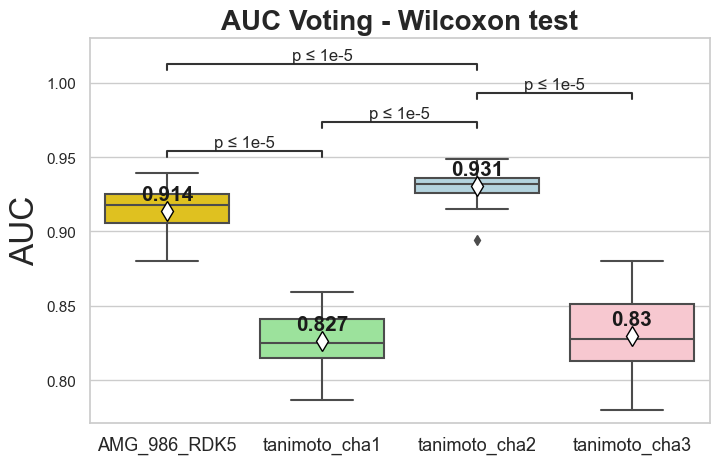

In [54]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(AUC_cha.reset_index(), id_vars=['index'], value_vars=AUC_cha.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(AUC_cha['AMG_986_RDK5'].astype('float'), AUC_cha['tanimoto_cha1'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC_cha['tanimoto_cha1'].astype('float'), AUC_cha['tanimoto_cha2'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC_cha['tanimoto_cha2'].astype('float'), AUC_cha['tanimoto_cha3'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC_cha['AMG_986_RDK5'].astype('float'), AUC_cha['tanimoto_cha2'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('AMG_986_RDK5','tanimoto_cha1'),
        ('tanimoto_cha1', 'tanimoto_cha2'),
         ('tanimoto_cha2','tanimoto_cha3'),
         ('AMG_986_RDK5','tanimoto_cha2'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
#sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
my_colors = {'AMG_986_RDK5': '#FFD700',
             'tanimoto_cha1': 'lightgreen',
             'tanimoto_cha2': 'lightblue',
             'tanimoto_cha3': 'pink'}


ax = sns.boxplot(x='Model', y='AUC', data=df_melt, palette = my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(AUC_cha.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =AUC_cha.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.008

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = AUC_cha.columns, fontsize = 13)
ax.set_title("AUC Voting - Wilcoxon test",fontsize = 20, weight ='semibold')
plt.savefig("./Image/AUC Voting.png", dpi = 600)

In [47]:
GH_cha = pd.DataFrame(list_GH_CHA, columns = model_cha)
GH_cha.insert(0,"AMG_986_RDK5", AMG_986_GH['RDK5'])
GH_cha.head()

,AMG_986_RDK5,tanimoto_cha1,tanimoto_cha2,tanimoto_cha3
0,0.795139,0.266494,0.770833,0.0
1,0.795139,0.215447,0.756944,0.0
2,0.812500,0.304471,0.760417,0.0
3,0.795139,0.169677,0.756944,0.0
4,0.791667,0.233116,0.760417,0.0


AMG_986_RDK5 vs. tanimoto_cha1: Custom statistical test, P_val:1.863e-09
tanimoto_cha1 vs. tanimoto_cha2: Custom statistical test, P_val:3.725e-09
tanimoto_cha2 vs. tanimoto_cha3: Custom statistical test, P_val:2.274e-06
AMG_986_RDK5 vs. tanimoto_cha2: Custom statistical test, P_val:1.863e-09


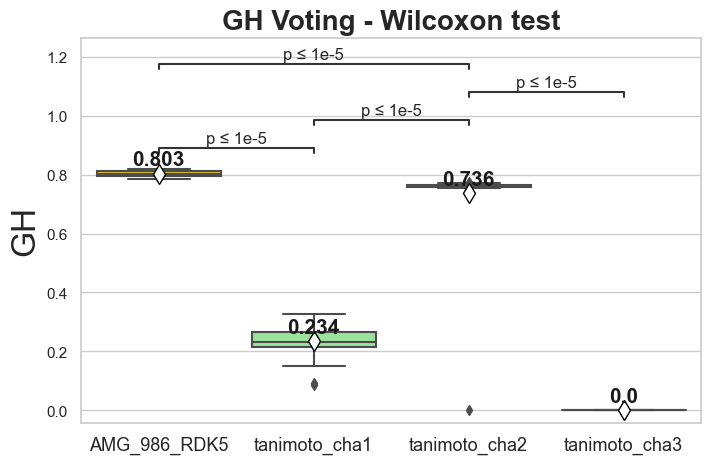

In [55]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(GH_cha.reset_index(), id_vars=['index'], value_vars=GH_cha.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(GH_cha['AMG_986_RDK5'].astype('float'), GH_cha['tanimoto_cha1'].astype('float'), alternative="two-sided"),
                wilcoxon(GH_cha['tanimoto_cha1'].astype('float'), GH_cha['tanimoto_cha2'].astype('float'), alternative="two-sided"),
                wilcoxon(GH_cha['tanimoto_cha2'].astype('float'), GH_cha['tanimoto_cha3'].astype('float'), alternative="two-sided"),
                wilcoxon(GH_cha['AMG_986_RDK5'].astype('float'), GH_cha['tanimoto_cha2'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'GH',
    'palette': subcat_palette[1:]
}

pairs = [('AMG_986_RDK5','tanimoto_cha1'),
        ('tanimoto_cha1', 'tanimoto_cha2'),
         ('tanimoto_cha2','tanimoto_cha3'),
         ('AMG_986_RDK5','tanimoto_cha2'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
#sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
my_colors = {'AMG_986_RDK5': '#FFD700',
             'tanimoto_cha1': 'lightgreen',
             'tanimoto_cha2': 'lightblue',
             'tanimoto_cha3': 'pink'}


ax = sns.boxplot(x='Model', y='GH', data=df_melt, palette = my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(GH_cha.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =GH_cha.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.06

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


ax.set_ylabel('GH', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = GH_cha.columns, fontsize = 13)
ax.set_title("GH Voting - Wilcoxon test",fontsize = 20, weight ='semibold')
plt.savefig("./Image/GH-Voting.png", dpi = 600)

In [56]:
F1_cha = pd.DataFrame(list_F1_CHA, columns = model_cha)
F1_cha.insert(0,"AMG_986_RDK5", AMG_986_F1['RDK5'])
F1_cha.head()

,AMG_986_RDK5,tanimoto_cha1,tanimoto_cha2,tanimoto_cha3
0,0.305882,0.164948,0.153846,0.0
1,0.305882,0.126316,0.054054,0.0
2,0.400000,0.226415,0.080000,0.0
3,0.305882,0.117647,0.054054,0.0
4,0.285714,0.144330,0.080000,0.0


AMG_986_RDK5 vs. tanimoto_cha1: Custom statistical test, P_val:1.863e-09
tanimoto_cha1 vs. tanimoto_cha2: Custom statistical test, P_val:6.147e-08
tanimoto_cha2 vs. tanimoto_cha3: Custom statistical test, P_val:2.274e-06


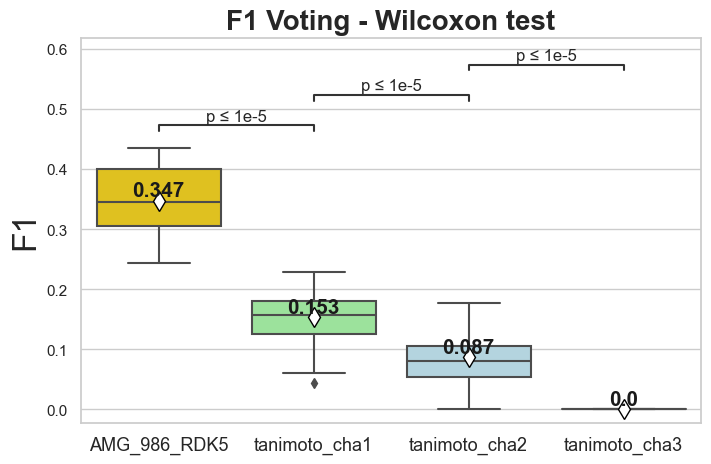

In [59]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(F1_cha.reset_index(), id_vars=['index'], value_vars=F1_cha.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(F1_cha['AMG_986_RDK5'].astype('float'), F1_cha['tanimoto_cha1'].astype('float'), alternative="two-sided"),
                wilcoxon(F1_cha['tanimoto_cha1'].astype('float'), F1_cha['tanimoto_cha2'].astype('float'), alternative="two-sided"),
                wilcoxon(F1_cha['tanimoto_cha2'].astype('float'), F1_cha['tanimoto_cha3'].astype('float'), alternative="two-sided")
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'F1',
    'palette': subcat_palette[1:]
}

pairs = [('AMG_986_RDK5','tanimoto_cha1'),
        ('tanimoto_cha1', 'tanimoto_cha2'),
         ('tanimoto_cha2','tanimoto_cha3')
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
#sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
my_colors = {'AMG_986_RDK5': '#FFD700',
             'tanimoto_cha1': 'lightgreen',
             'tanimoto_cha2': 'lightblue',
             'tanimoto_cha3': 'pink'}


ax = sns.boxplot(x='Model', y='F1', data=df_melt, palette = my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(F1_cha.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =F1_cha.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.06

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)


ax.set_ylabel('F1', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = F1_cha.columns, fontsize = 13)
ax.set_title("F1 Voting - Wilcoxon test",fontsize = 20, weight ='semibold')
plt.savefig("./Image/F1-Voting.png", dpi = 600)

# 5. Stacking

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np 
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, roc_auc_score
def get_external(y_true, y_pred, score):
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, score)
    gh = GH_score(y_true, y_pred)
    ef1 = EF1_score(y_true, y_pred)
    return f1, auc, gh,ef1

cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
clf = XGBClassifier(random_state=42)
col = ['Active','tanimoto_avalon',
 'tanimoto_maccs',
 'tanimoto_ecfp2',
 'tanimoto_ecfp4',
 'tanimoto_ecfp6',
 'tanimoto_fcfp2',
 'tanimoto_fcfp4',
 'tanimoto_fcfp6',
 'tanimoto_rdk5',
 'tanimoto_rdk6',
 'tanimoto_rdk7',
 'tanimoto_map4']

In [10]:
path = './Data/Raw_data'

clf = XGBClassifier(random_state=42)
data = pd.read_csv('./Data/Raw_data/AMG 986.csv')
data = data[col]

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Active'], axis = 1), 
                                                    data.Active, test_size=0.2, random_state=42, stratify = data.Active)
    
print('****Internal******')
auc= cross_val_score(clf, X_train, y_train, cv=cv, scoring ='roc_auc')
print(f'AUC = {round(np.mean(auc),3)}±{round(np.std(auc),3)}')
    

f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring ='f1')
print(f'F1 = {round(np.mean(f1),3)}±{round(np.std(f1),3)}')

    
GH = cross_val_score(clf, X_train, y_train, cv=cv, scoring =GH_scoring)
print(f'GH = {round(np.mean(GH),3)}±{round(np.std(GH),3)}')

          
ef1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring = EF1_scoring)
print(f'EF1 = {round(np.mean(ef1),3)}±{round(np.std(ef1),3)}')

    

    
print('****External******')
clf =  XGBClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test),))
    
ext_f1, ext_auc, ext_gh, ext_ef1= get_external(y_test, clf.predict(X_test), clf.predict_proba(X_test)[:, 1])
print('F1 =', ext_f1)
print('AUC =', ext_auc)
print('GH =', ext_gh)
print('EF1 =', ext_ef1)


****Internal******
AUC = 0.996±0.004
F1 = 0.864±0.034


NameError: name 'GH_scoring' is not defined

In [73]:
query[1].GetProp("_Name")

'AMG 986'

In [ ]:
model_stacking = []
list_auc_stacking = []
list_f1_stacking = []
list_GH_stacking = []

path = 'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'
for i in query:
    print(query[i].GetProp("_Name"))
    clf = XGBClassifier(random_state=42)
    data = pd.read_csv(path+f'/{i.GetProp("_Name")}.csv')
    data = data[col]

    X_train, X_test, y_train, y_test = train_test_split(data.drop(['Active'], axis = 1), 
                                                    data.Active, test_size=0.2, random_state=42, stratify = data.Active)
    
    #Internal
    auc= cross_val_score(clf, X_train, y_train, cv=cv, scoring ='roc_auc')
    print(f'AUC = {round(np.mean(auc),3)}±{round(np.std(auc),3)}')
    list_auc_stacking.append(auc)

    f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring ='f1')
    print(f'F1 = {round(np.mean(f1),3)}±{round(np.std(f1),3)}')
    list_f1_stacking.append(f1)
    
    GH = cross_val_score(clf, X_train, y_train, cv=cv, scoring =GH_scoring)
    print(f'GH = {round(np.mean(GH),3)}±{round(np.std(GH),3)}')
    list_GH_stacking.append(GH)
    
    model_stacking.append(i.GetProp('_Name'))
    
    #External
    clf =  XGBClassifier(random_state=42)
    clf = clf.fit(X_train, y_train)
    print(classification_report(y_test, clf.predict(X_test),))
    
    ext_f1, ext_auc, ext_gh= get_external(y_test, clf.predict(X_test), clf.predict_proba(X_test)[:, 1])
    print('F1 =', ext_f1)
    print('AUC =', ext_auc)
    print('GH =', ext_gh)


In [75]:
AUC_stacking = pd.DataFrame(list_auc_stacking, index =  model_stacking).T
F1_stacking = pd.DataFrame(list_f1_stacking, index =  model_stacking).T
GH_stacking = pd.DataFrame(list_GH_stacking, index =  model_stacking).T
EF1_stacking = pd.DataFrame(list_ef1_stacking, index =  model_stacking).T

CMF-019 vs. AMG 986: Custom statistical test, P_val:9.301e-03
AMG 986 vs. BMS-986224: Custom statistical test, P_val:4.971e-02
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.639e-07


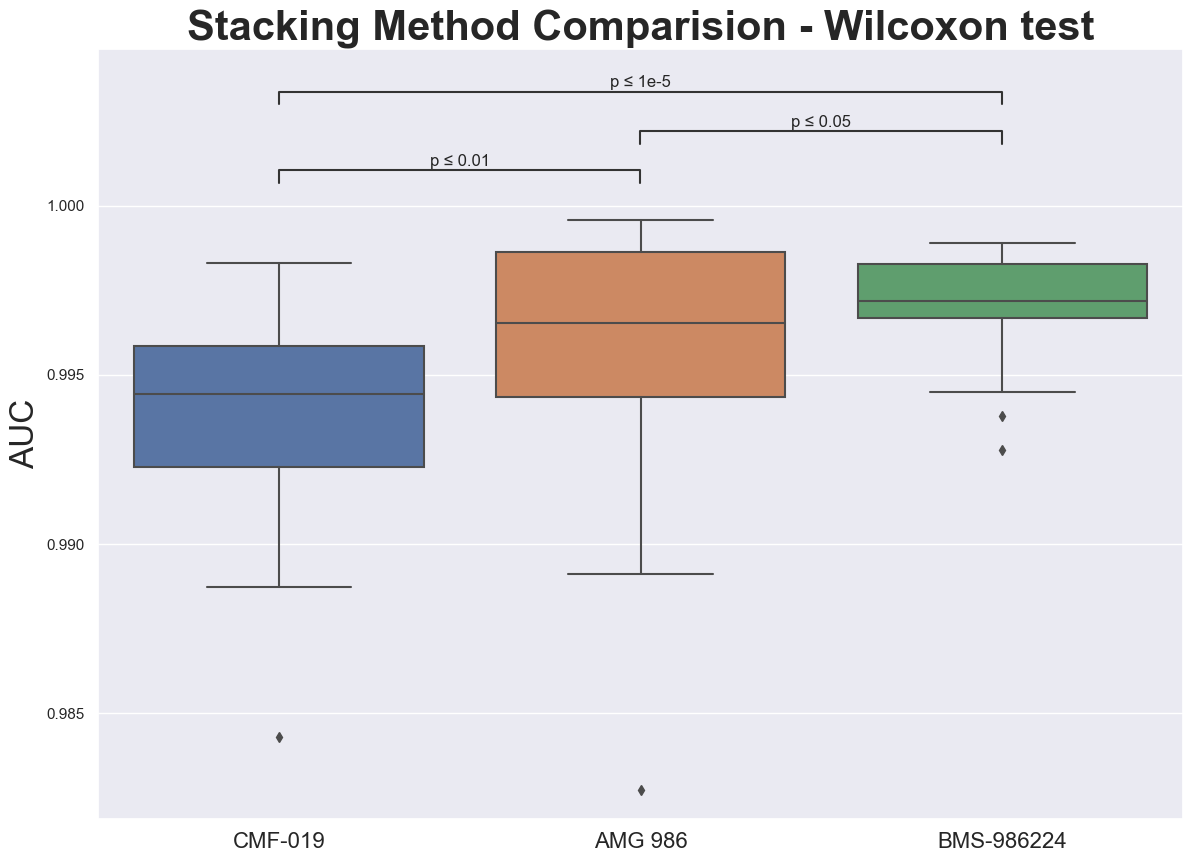

In [47]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(AUC.reset_index(), id_vars=['index'], value_vars=AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(AUC['CMF-019'].astype('float'), AUC['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC['AMG 986'].astype('float'), AUC['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(AUC['CMF-019'].astype('float'), AUC['BMS-986224'].astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stack.astype('float'), auc_stackvar.astype('float'), alternative="two-sided"),
                #wilcoxon(auc_stackvar.astype('float'), global_auc_stackvar.astype('float'), alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='AUC', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/AUC- Stacking Fingerprint.png", dpi = 600)

CMF-019 vs. AMG 986: Custom statistical test, P_val:1.304e-07
AMG 986 vs. BMS-986224: Custom statistical test, P_val:3.044e-01
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.863e-09


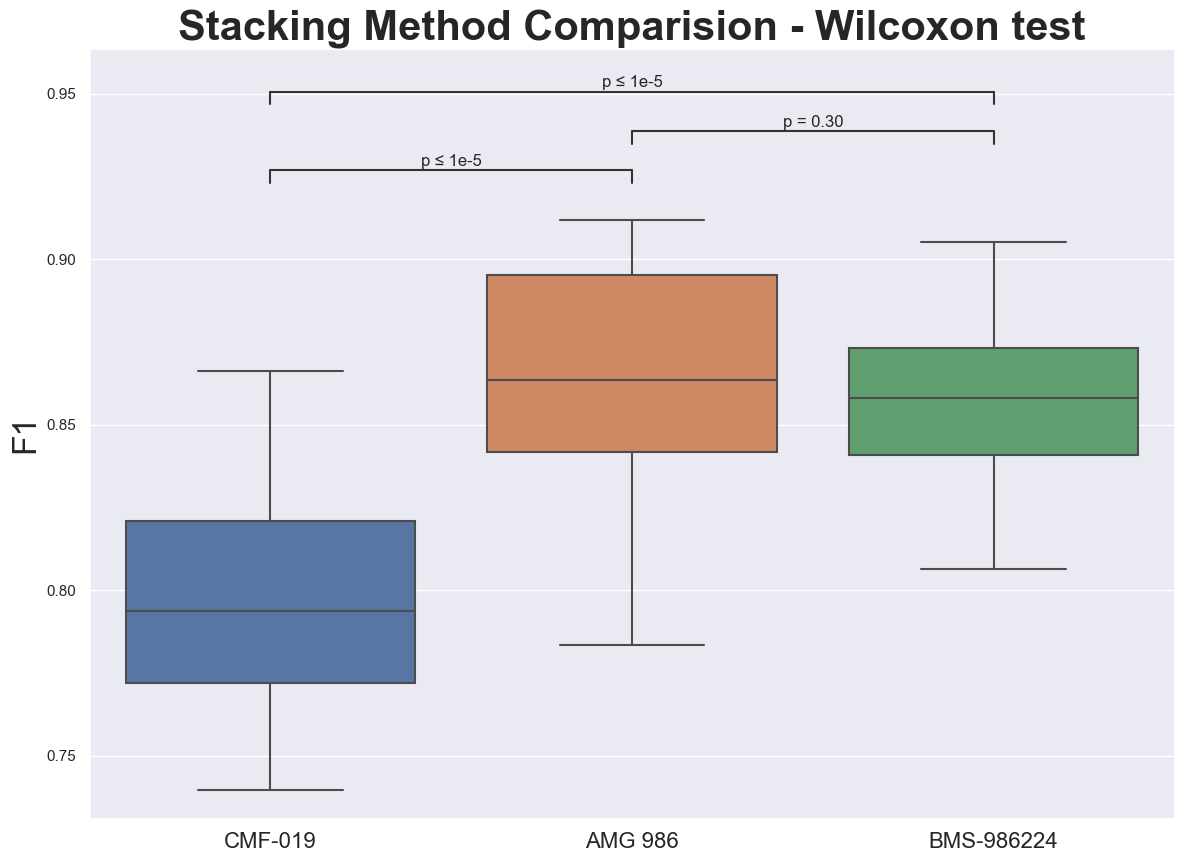

In [48]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(F1.reset_index(), id_vars=['index'], value_vars=F1.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(F1['CMF-019'].astype('float'), F1['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(F1['AMG 986'].astype('float'), F1['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(F1['CMF-019'].astype('float'), F1['BMS-986224'].astype('float'), alternative="two-sided"),
                
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'F1',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='F1', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('F1', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/F1- Stacking Fingerprint.png", dpi = 600)

CMF-019 vs. AMG 986: Custom statistical test, P_val:1.192e-06
AMG 986 vs. BMS-986224: Custom statistical test, P_val:3.044e-01
CMF-019 vs. BMS-986224: Custom statistical test, P_val:1.061e-05


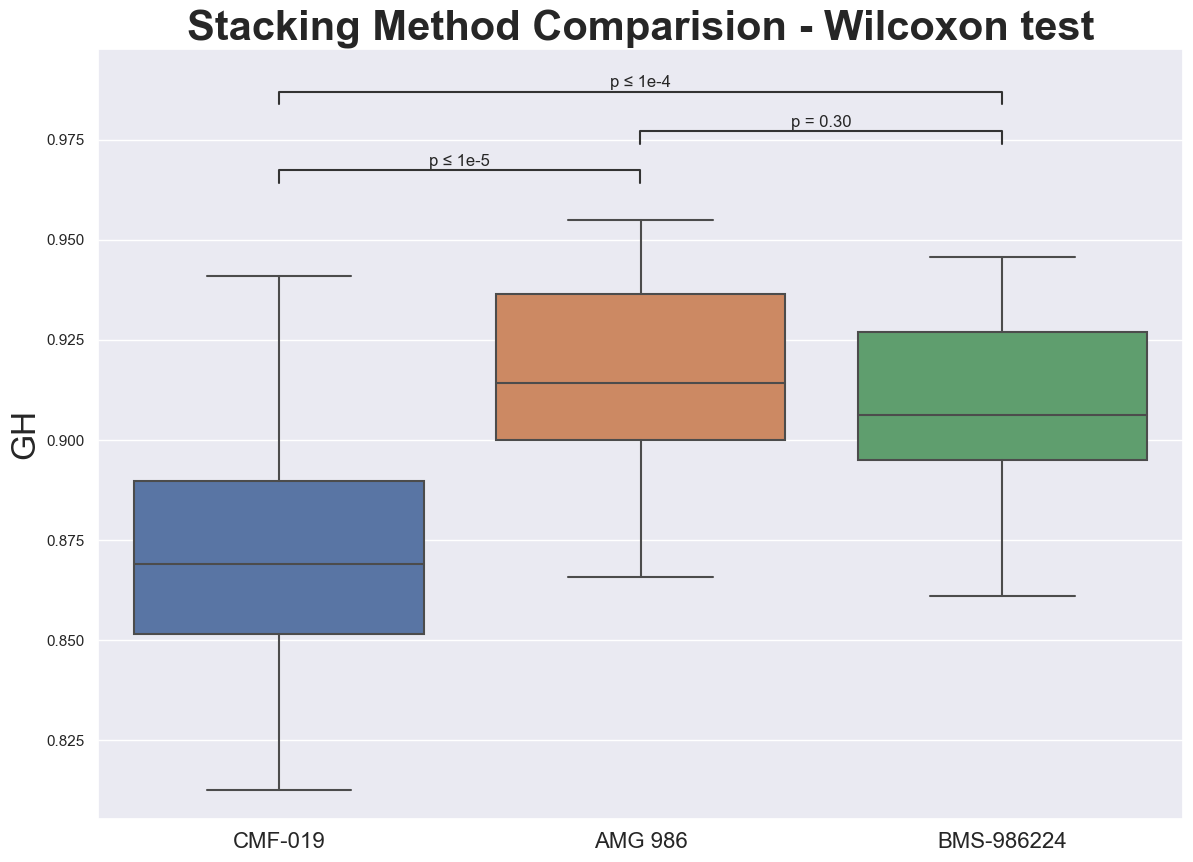

In [49]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(GH.reset_index(), id_vars=['index'], value_vars=GH.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(GH['CMF-019'].astype('float'), GH['AMG 986'].astype('float'), alternative="two-sided"),
                wilcoxon(GH['AMG 986'].astype('float'), GH['BMS-986224'].astype('float'), alternative="two-sided"),
                wilcoxon(GH['CMF-019'].astype('float'), GH['BMS-986224'].astype('float'), alternative="two-sided"),
                
]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'GH',
    'palette': subcat_palette[1:]
}

pairs = [('CMF-019', 'AMG 986'),
         ('AMG 986','BMS-986224'),
         ('CMF-019','BMS-986224'),
        #('Stacking','Stacking-var'),
        #('Stacking-var','Global_stackvar')
        ]
plt.figure(figsize = (14,10))

ax = sns.boxplot(x='Model', y='GH', data=df_melt)


annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)
ax.set_ylabel('GH', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = model, fontsize = 16)
ax.set_title("Stacking Method Comparision - Wilcoxon test",fontsize = 30, weight ='semibold')
plt.savefig("./Image/GH- Stacking Fingerprint.png", dpi = 600)

# 6. Optimization

- FP Selection for AMG 986

In [63]:
path

'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'

In [64]:
AMG = pd.read_csv(f"{path}/AMG 986.csv")
AMG.head()

,Unnamed: 0,ID,Active,CanonSmiles,Molecule,ROMol,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp2,tanimoto_ecfp4,...,dice_ecfp2,dice_ecfp4,dice_ecfp6,dice_fcfp2,dice_fcfp4,dice_fcfp6,dice_rdk5,dice_rdk6,dice_rdk7,dice_map4
0,0,Active_1,1,CC[C@H](C)[C@@H](CC(=O)O)NC(=O)c1ccc2c(c1)nc(C...,<rdkit.Chem.rdchem.Mol object at 0x7fb7686e13c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb7640617b0>,0.406015,0.423913,0.190476,0.106195,...,0.320000,0.192000,0.140351,0.058824,0.017391,0.012270,0.331361,0.443256,0.409178,0.603200
1,1,Active_2,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@H](CC(=O)O)...,<rdkit.Chem.rdchem.Mol object at 0x7fb7684ad270>,<rdkit.Chem.rdchem.Mol object at 0x7fb764061660>,0.379048,0.388889,0.177419,0.098214,...,0.301370,0.178862,0.142857,0.060606,0.017699,0.025000,0.330330,0.429262,0.403383,0.580977
2,2,Active_3,1,C[C@@H]1CCCC[C@H]1n1c(Cc2cccs2)nc2cc(C(=O)NC3(...,<rdkit.Chem.rdchem.Mol object at 0x7fb7684ad2e0>,<rdkit.Chem.rdchem.Mol object at 0x7fb764061890>,0.404059,0.408602,0.161290,0.088496,...,0.277778,0.162602,0.116959,0.030769,0.035398,0.024540,0.334317,0.441956,0.416772,0.597738
3,3,Active_4,1,CC[C@H](C)[C@@H](CCC(=O)O)NC(=O)c1ccc2c(c1)nc(...,<rdkit.Chem.rdchem.Mol object at 0x7fb7684ad350>,<rdkit.Chem.rdchem.Mol object at 0x7fb76408b0b0>,0.407895,0.417582,0.187500,0.104348,...,0.315789,0.188976,0.137931,0.057971,0.017094,0.012048,0.333996,0.440455,0.403469,0.610675
4,4,Active_5,1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)N[C@@H](CC(C)C)...,<rdkit.Chem.rdchem.Mol object at 0x7fb7684ad3c0>,<rdkit.Chem.rdchem.Mol object at 0x7fb76408b350>,0.391144,0.428571,0.200000,0.110092,...,0.333333,0.198347,0.146341,0.030769,0.018018,0.012821,0.342801,0.440095,0.402961,0.598832


In [65]:
data_opt_AMG= AMG[col]


#split data
from sklearn.model_selection import train_test_split
X_train_opt_AMG, X_test_opt_AMG, y_train_opt_AMG, y_test_opt_AMG = train_test_split(data_opt_AMG.drop(['Active'], axis = 1), 
                                                    data_opt_AMG.Active, test_size=0.2, random_state=42, 
                                                    stratify = data_opt_AMG.Active)
    
X_train_opt_AMG

,tanimoto_avalon,tanimoto_maccs,tanimoto_ecfp2,tanimoto_ecfp4,tanimoto_ecfp6,tanimoto_fcfp2,tanimoto_fcfp4,tanimoto_fcfp6,tanimoto_rdk5,tanimoto_rdk6,tanimoto_rdk7,tanimoto_map4
5711,0.242494,0.387097,0.233333,0.140187,0.106667,0.030769,0.018182,0.000000,0.162297,0.239804,0.212906,0.433372
42915,0.341772,0.527473,0.274194,0.165217,0.115854,0.043478,0.042017,0.023392,0.200684,0.284314,0.247984,0.464646
26797,0.286624,0.457447,0.134328,0.106195,0.081761,0.000000,0.000000,0.000000,0.203586,0.318984,0.295131,0.466363
24470,0.334043,0.357143,0.157143,0.089431,0.071006,0.013699,0.008130,0.005814,0.202503,0.298711,0.281157,0.456062
15916,0.297521,0.413043,0.163934,0.098214,0.069620,0.000000,0.008929,0.000000,0.189018,0.315501,0.295969,0.444698
...,...,...,...,...,...,...,...,...,...,...,...,...
14037,0.305907,0.397849,0.209677,0.131579,0.090909,0.000000,0.025862,0.011765,0.208609,0.320115,0.278131,0.478166
11028,0.422139,0.494624,0.210526,0.117647,0.085106,0.050847,0.009709,0.000000,0.179935,0.294334,0.252416,0.398542
19038,0.450652,0.646341,0.222222,0.127273,0.103896,0.014493,0.008850,0.006211,0.219907,0.303464,0.261179,0.434733
21054,0.364000,0.505495,0.203125,0.153153,0.102564,0.014493,0.000000,0.000000,0.177901,0.292184,0.260653,0.448546


## Random Forest

In [66]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
model_AMG_RF = RandomForestClassifier(random_state=42)
model_AMG_RF.fit(X_train_opt_AMG, y_train_opt_AMG)
select_AMG_RF =  SelectFromModel(model_AMG_RF, prefit=True)

X_train_new_AMG_RF = select_AMG_RF.transform(X_train_opt_AMG.values)
X_test_new_AMG_RF = select_AMG_RF.transform(X_test_opt_AMG.values)
model_opt_AMG_RF = XGBClassifier(random_state=42)
model_opt_AMG_RF.fit(X_train_new_AMG_RF, y_train_opt_AMG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [67]:
#cross-validation

from sklearn.model_selection import cross_val_score
import numpy as np 
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
clf = XGBClassifier(random_state=42)


auc_opt_AMG_RF = cross_val_score(clf, X_train_new_AMG_RF, y_train_opt_AMG, cv=cv, scoring ='roc_auc')
#list_auc_opt.append(auc_opt)
print(f'AUC = {round(np.mean(auc_opt_AMG_RF ),3)}±{round(np.std(auc_opt_AMG_RF ),3)}')

f1_opt_AMG_RF = cross_val_score(clf, X_train_new_AMG_RF, y_train_opt_AMG, cv=cv, scoring ='f1')
#list_f1_opt.append(f1_opt)
print(f'F1 = {round(np.mean(f1_opt_AMG_RF ),3)}±{round(np.std(f1_opt_AMG_RF ),3)}')    

GH_opt_AMG_RF = cross_val_score(clf, X_train_new_AMG_RF, y_train_opt_AMG, cv=cv, scoring =GH_scoring)
#list_GH_opt.append(GH_opt)    
print(f'GH = {round(np.mean(GH_opt_AMG_RF ),3)}±{round(np.std(GH_opt_AMG_RF ),3)}')

EF1_opt_AMG_RF = cross_val_score(clf, X_train_new_AMG_RF, y_train_opt_AMG, cv=cv, scoring =EF1_scoring)
#list_GH_opt.append(GH_opt)    
print(f'EF1 = {round(np.mean(EF1_opt_AMG_RF ),3)}±{round(np.std(EF1_opt_AMG_RF ),3)}')

AUC = 0.992±0.005
F1 = 0.825±0.036
GH = 0.877±0.031
EF1 = 50.07±0.211


In [110]:
#test- validation
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, roc_auc_score


print(classification_report(y_test_opt_AMG, model_opt_AMG_RF .predict(X_test_new_AMG_RF ),))

ext_f1_opt_AMG_RF , ext_auc_opt_AMG_RF , ext_gh_opt_AMG_RF , ext_ef1_opt_AMG_RF  = get_external(y_test_opt_AMG, model_opt_AMG_RF .predict(X_test_new_AMG_RF ),
                                                                        model_opt_AMG_RF .predict_proba(X_test_new_AMG_RF )[:, 1])
print('F1 =', ext_f1_opt_AMG_RF)
print('AUC =', ext_auc_opt_AMG_RF)
print('GH =', ext_gh_opt_AMG_RF)
print("EF1 =", ext_ef1_opt_AMG_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8863
           1       0.93      0.76      0.83       180

    accuracy                           0.99      9043
   macro avg       0.96      0.88      0.92      9043
weighted avg       0.99      0.99      0.99      9043

F1 = 0.834355828220859
AUC = 0.9944739052490378
GH = 0.8865176504651989
EF1 = 50.0


In [82]:
feature_name_AMG_RF  = select_AMG_RF.get_feature_names_out(X_train_opt_AMG.columns)
feature_name_AMG_RF

array(['tanimoto_avalon', 'tanimoto_maccs', 'tanimoto_ecfp4',
       'tanimoto_ecfp6', 'tanimoto_rdk5', 'tanimoto_rdk6',
       'tanimoto_rdk7'], dtype=object)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(14,6))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type +"- " 'FEATURE IMPORTANCE', fontsize = 30, weight ='semibold' )
    plt.xlabel('FEATURE IMPORTANCE', fontsize = 24, weight ='semibold')
    plt.savefig("./Image/ {model_type} - FEATURE IMPORTANCE.png", dpi = 600)
    

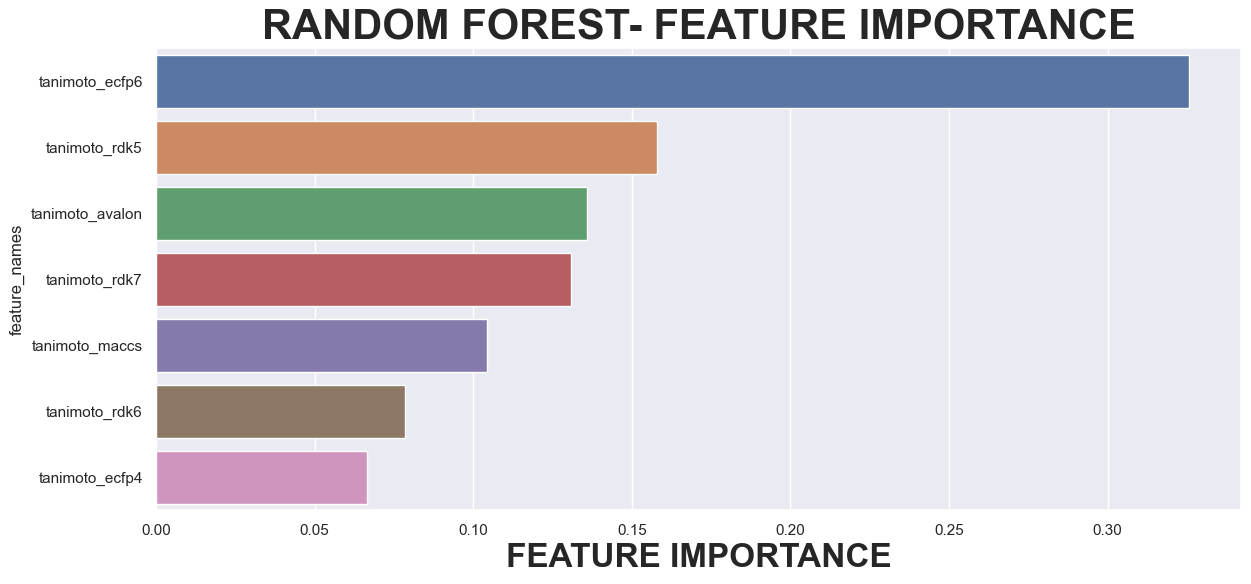

In [84]:
plot_feature_importance(model_opt_AMG_RF.feature_importances_, feature_name_AMG_RF ,'RANDOM FOREST')

## XGB

In [152]:
#XGB
from sklearn.feature_selection import SelectFromModel
model_AMG_XGB = XGBClassifier(random_state=42)
model_AMG_XGB.fit(X_train_opt_AMG, y_train_opt_AMG)
select_AMG_XGB =  SelectFromModel(model_AMG_XGB, prefit=True)

X_train_new_AMG_XGB = select_AMG_XGB.transform(X_train_opt_AMG.values)
X_test_new_AMG_XGB = select_AMG_XGB.transform(X_test_opt_AMG.values)
model_opt_AMG_XGB = XGBClassifier(random_state=42)
model_opt_AMG_XGB.fit(X_train_new_AMG_XGB , y_train_opt_AMG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [153]:
#cross-validation

from sklearn.model_selection import cross_val_score
import numpy as np 
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)
clf = XGBClassifier(random_state=42)


auc_opt_AMG_XGB = cross_val_score(clf, X_train_new_AMG_XGB, y_train_opt_AMG, cv=cv, scoring ='roc_auc')
#list_auc_opt.append(auc_opt)
print(f'AUC = {round(np.mean(auc_opt_AMG_XGB ),3)}±{round(np.std(auc_opt_AMG_XGB ),3)}')

f1_opt_AMG_XGB = cross_val_score(clf, X_train_new_AMG_XGB, y_train_opt_AMG, cv=cv, scoring ='f1')
#list_f1_opt.append(f1_opt)
print(f'F1 = {round(np.mean(f1_opt_AMG_XGB ),3)}±{round(np.std(f1_opt_AMG_XGB ),3)}')    

recall_opt_AMG_XGB = cross_val_score(clf, X_train_new_AMG_XGB, y_train_opt_AMG, cv=cv, scoring ='recall')
#list_recall_opt.append(recall_opt)
print(f'Recall = {round(np.mean(recall_opt_AMG_XGB ),3)}±{round(np.std(recall_opt_AMG_XGB ),3)}')

GH_opt_AMG_XGB = cross_val_score(clf, X_train_new_AMG_XGB, y_train_opt_AMG, cv=cv, scoring =GH_scoring)
#list_GH_opt.append(GH_opt)    
print(f'GH = {round(np.mean(GH_opt_AMG_XGB),3)}±{round(np.std(GH_opt_AMG_XGB),3)}')

AUC = 0.983±0.006
F1 = 0.663±0.045
Recall = 0.562±0.061
GH = 0.749±0.039


In [154]:
#test- validation
print(classification_report(y_test_opt_AMG, model_opt_AMG_XGB .predict(X_test_new_AMG_XGB ),))

ext_f1_opt_AMG_XGB , ext_auc_opt_AMG_XGB , ext_gh_opt_AMG_XGB , ext_recall_opt_AMG_XGB  = get_external(y_test_opt_AMG, model_opt_AMG_XGB .predict(X_test_new_AMG_XGB ),
                                                                        model_opt_AMG_XGB .predict_proba(X_test_new_AMG_XGB )[:, 1])
print('F1 =', ext_f1_opt_AMG_XGB)
print('AUC =', ext_auc_opt_AMG_XGB)
print('GH =', ext_gh_opt_AMG_XGB)
print("Recall =", ext_recall_opt_AMG_XGB)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8863
           1       0.84      0.59      0.70       180

    accuracy                           0.99      9043
   macro avg       0.92      0.80      0.85      9043
weighted avg       0.99      0.99      0.99      9043

F1 = 0.6970684039087948
AUC = 0.9831383905625134
GH = 0.7787396182622045
Recall = 0.5944444444444444


In [155]:
feature_name_AMG_XGB  = select_AMG_XGB.get_feature_names_out(X_train_opt_AMG.columns)
feature_name_AMG_XGB

array(['tanimoto_avalon', 'tanimoto_ecfp6', 'tanimoto_rdk5',
       'tanimoto_rdk7'], dtype=object)

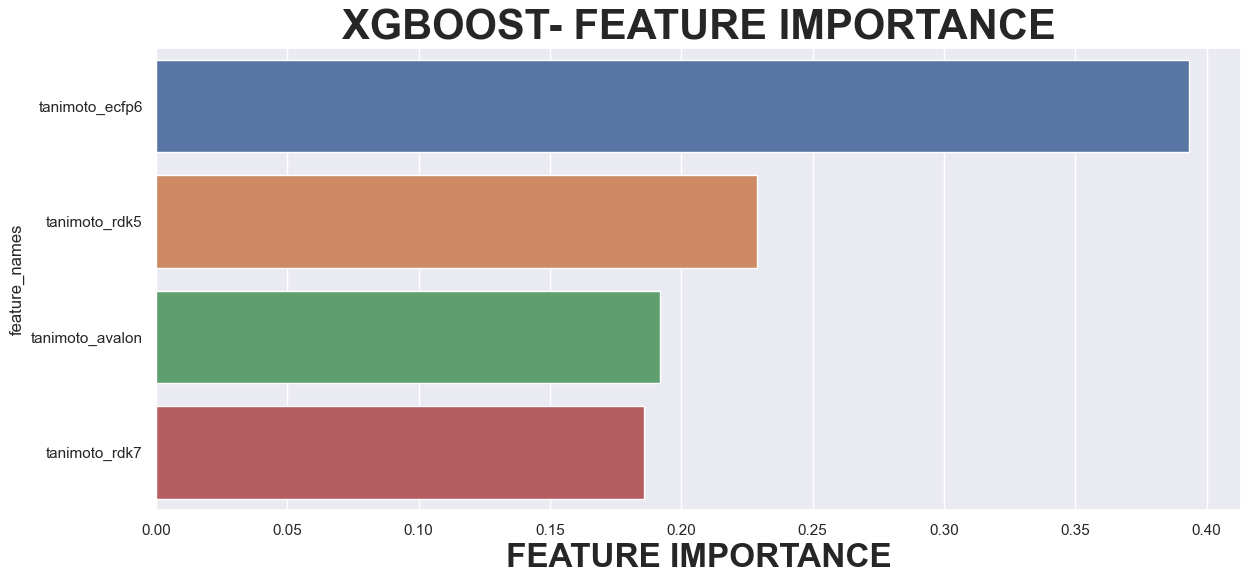

In [156]:
plot_feature_importance(model_opt_AMG_XGB.feature_importances_, feature_name_AMG_XGB ,'XGBOOST')

# 7. Internal comparison

- AMG_986_RDK7
- Ensemble
- Stacking - AMG 986
- Optimization

In [45]:
#index = ['AMG_986_rdk5', 'AMG_986_stacking','AMG_986_optimal']

#AMG-986-RDK5
#AMG_986_AUC = AUC.iloc[30:60,:].reset_index(drop=True)
#AMG_986_F1 = F1.iloc[30:60,:].reset_index(drop=True)
#AMG_986_GH = GH.iloc[30:60,:].reset_index(drop=True)

#Ensemble
#AUC_cha = pd.DataFrame(list_AUC_CHA, columns = model_cha)
#F1_cha = pd.DataFrame(list_F1_CHA, columns = model_cha)
#GH_cha = pd.DataFrame(list_GH_CHA, columns = model_cha)

#stacking
#AUC_stacking = pd.DataFrame(list_auc_stacking, index =  model).T
#F1_stacking = pd.DataFrame(list_f1_stacking, index =  model).T
#GH_stacking = pd.DataFrame(list_GH_stacking, index =  model).T

#opt
#auc_opt_AMG_RF
#GH_opt_AMG_RF
#f1_opt_AMG_RF

In [86]:
#AUC
index = ['AMG_986_rdk5','Ensemble-CHA2','AMG_986_stacking','AMG_986_optimal']
AUC_internal = []
AUC_internal.append(AMG_986_AUC['RDK5'])
AUC_internal.append(AUC_cha['tanimoto_cha2'])
AUC_internal.append(auc)
AUC_internal.append(auc_opt_AMG_RF)

In [70]:
#F1
index = ['AMG_986_rdk5','Ensemble-CHA2','AMG_986_stacking','AMG_986_optimal']
F1_internal = []
F1_internal.append(AMG_986_F1['RDK5'])
F1_internal.append(F1_cha['tanimoto_cha2'])
F1_internal.append(f1)
F1_internal.append(f1_opt_AMG_RF)


In [85]:
#GH
index = ['AMG_986_rdk5','Ensemble-CHA2','AMG_986_stacking','AMG_986_optimal']
GH_internal = []
GH_internal.append(AMG_986_GH['RDK5'])
GH_internal.append(GH_cha['tanimoto_cha2'])
GH_internal.append(GH)
GH_internal.append(GH_opt_AMG_RF)

In [73]:
df_AUC_internal = pd.DataFrame(AUC_internal, index = index).T
df_AUC_internal 

,AMG_986_rdk5,Ensemble-CHA2,AMG_986_stacking,AMG_986_optimal
0,0.905,0.935,0.998962,0.995871
1,0.894,0.928,0.996979,0.992936
2,0.918,0.949,0.995671,0.995545
3,0.883,0.894,0.990233,0.989915
4,0.920,0.942,0.990836,0.989880
5,0.920,0.936,0.994723,0.991330
6,0.925,0.930,0.998472,0.994899
7,0.913,0.926,0.999193,0.998272
8,0.934,0.928,0.989108,0.976743
9,0.932,0.938,0.998208,0.996690


AMG_986_rdk5 vs. Ensemble-CHA2: Custom statistical test, P_val:4.657e-08
Ensemble-CHA2 vs. AMG_986_stacking: Custom statistical test, P_val:1.863e-09
AMG_986_stacking vs. AMG_986_optimal: Custom statistical test, P_val:5.588e-09


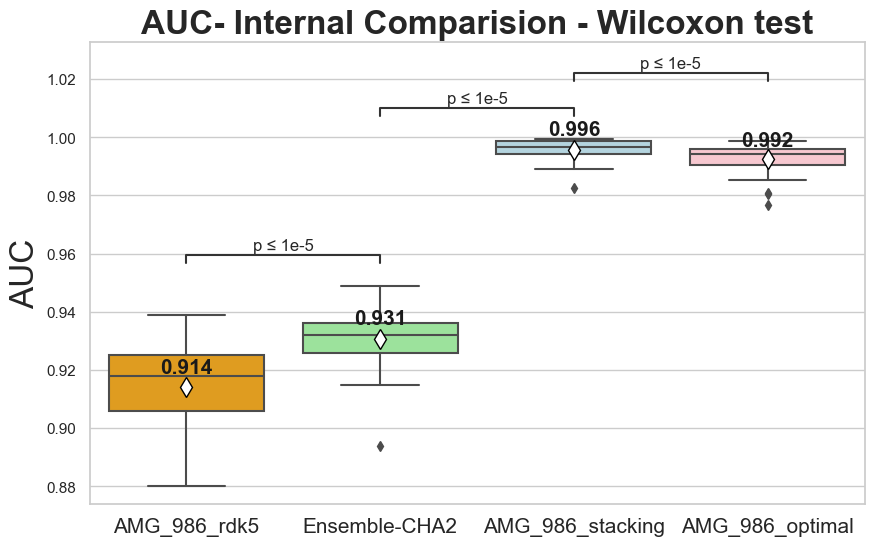

In [78]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_AUC_internal.reset_index(), id_vars=['index'], value_vars=df_AUC_internal.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_AUC_internal['AMG_986_rdk5'].astype('float'), df_AUC_internal['Ensemble-CHA2'].astype('float'), alternative="two-sided"),
                wilcoxon(df_AUC_internal['Ensemble-CHA2'].astype('float'), df_AUC_internal['AMG_986_stacking'].astype('float'), alternative="two-sided"),
                wilcoxon(df_AUC_internal['AMG_986_stacking'].astype('float'), df_AUC_internal['AMG_986_optimal'].astype('float'), alternative="two-sided")
               ]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('AMG_986_rdk5', 'Ensemble-CHA2'),
         ('Ensemble-CHA2', 'AMG_986_stacking'),
         ('AMG_986_stacking', 'AMG_986_optimal')
        ]

plt.figure(figsize = (10,6))
my_colors = {'AMG_986_rdk5': 'orange',
             'Ensemble-CHA2': 'lightgreen',
             'AMG_986_stacking': 'lightblue',
             'AMG_986_optimal': 'pink'}

ax = sns.boxplot(x='Model', y='AUC', data=df_melt,palette = my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(df_AUC_internal.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =df_AUC_internal.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.005

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel('AUC', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_AUC_internal.columns, fontsize = 15)
ax.set_title("AUC- Internal Comparision - Wilcoxon test",fontsize = 24, weight ='semibold')
plt.savefig("./Image/AUC Internal Comparision.png", dpi = 600)

In [87]:
df_GH_internal = pd.DataFrame(GH_internal, index = index).T

AMG_986_rdk5 vs. Ensemble-CHA2: Custom statistical test, P_val:1.863e-09
Ensemble-CHA2 vs. AMG_986_stacking: Custom statistical test, P_val:1.863e-09
AMG_986_stacking vs. AMG_986_optimal: Custom statistical test, P_val:9.313e-09


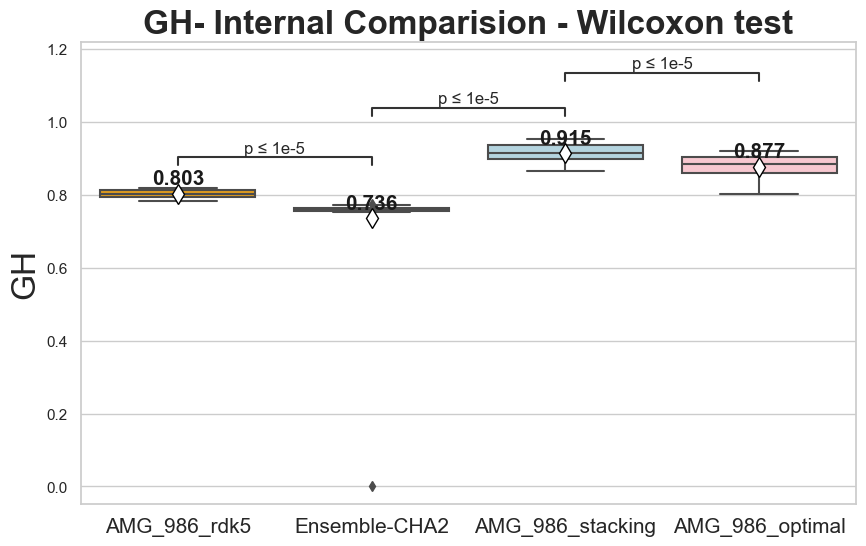

In [95]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_GH_internal.reset_index(), id_vars=['index'], value_vars=df_GH_internal.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_GH_internal['AMG_986_rdk5'].astype('float'), df_GH_internal['Ensemble-CHA2'].astype('float'), alternative="two-sided"),
                wilcoxon(df_GH_internal['Ensemble-CHA2'].astype('float'), df_GH_internal['AMG_986_stacking'].astype('float'), alternative="two-sided"),
                wilcoxon(df_GH_internal['AMG_986_stacking'].astype('float'), df_GH_internal['AMG_986_optimal'].astype('float'), alternative="two-sided")
               ]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'GH',
    'palette': subcat_palette[1:]
}

pairs = [('AMG_986_rdk5', 'Ensemble-CHA2'),
         ('Ensemble-CHA2', 'AMG_986_stacking'),
         ('AMG_986_stacking', 'AMG_986_optimal')
        ]

plt.figure(figsize = (10,6))
my_colors = {'AMG_986_rdk5': 'orange',
             'Ensemble-CHA2': 'lightgreen',
             'AMG_986_stacking': 'lightblue',
             'AMG_986_optimal': 'pink'}
ax = sns.boxplot(x='Model', y='GH', data=df_melt,palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(df_GH_internal.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =df_GH_internal.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.03

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel('GH', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_GH_internal.columns, fontsize = 15)
ax.set_title("GH- Internal Comparision - Wilcoxon test",fontsize = 24, weight ='semibold')
plt.savefig("./Image/GH Internal Comparision.png", dpi = 600)

In [96]:
df_F1_internal = pd.DataFrame(F1_internal, index = index).T

AMG_986_rdk5 vs. Ensemble-CHA2: Custom statistical test, P_val:1.863e-09
Ensemble-CHA2 vs. AMG_986_stacking: Custom statistical test, P_val:1.863e-09
AMG_986_stacking vs. AMG_986_optimal: Custom statistical test, P_val:5.588e-09


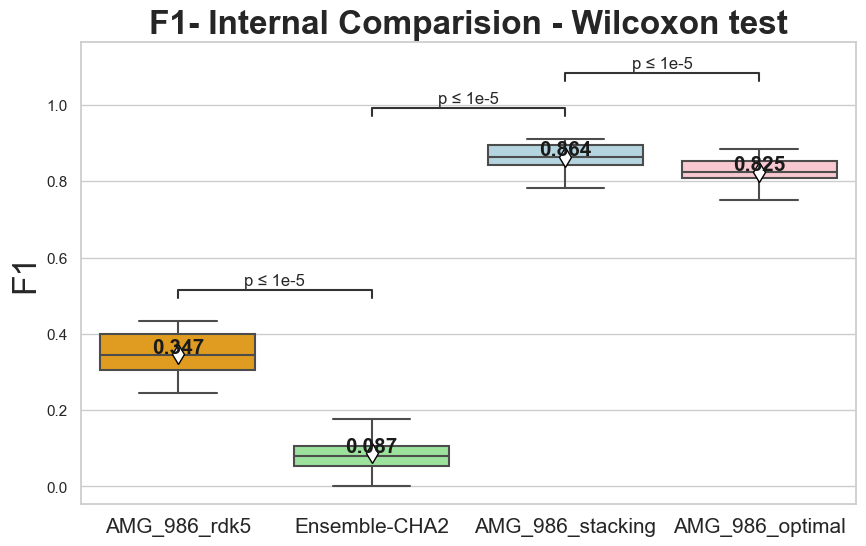

In [98]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_F1_internal.reset_index(), id_vars=['index'], value_vars=df_F1_internal.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_F1_internal['AMG_986_rdk5'].astype('float'), df_F1_internal['Ensemble-CHA2'].astype('float'), alternative="two-sided"),
                wilcoxon(df_F1_internal['Ensemble-CHA2'].astype('float'), df_F1_internal['AMG_986_stacking'].astype('float'), alternative="two-sided"),
                wilcoxon(df_F1_internal['AMG_986_stacking'].astype('float'), df_F1_internal['AMG_986_optimal'].astype('float'), alternative="two-sided")
               ]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'F1',
    'palette': subcat_palette[1:]
}

pairs = [('AMG_986_rdk5', 'Ensemble-CHA2'),
         ('Ensemble-CHA2', 'AMG_986_stacking'),
         ('AMG_986_stacking', 'AMG_986_optimal')
        ]

plt.figure(figsize = (10,6))
my_colors = {'AMG_986_rdk5': 'orange',
             'Ensemble-CHA2': 'lightgreen',
             'AMG_986_stacking': 'lightblue',
             'AMG_986_optimal': 'pink'}

ax = sns.boxplot(x='Model', y='F1', data=df_melt,palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(df_F1_internal.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =df_F1_internal.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.005

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 15)

annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel('F1', fontsize = 24)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_F1_internal.columns, fontsize = 15)
ax.set_title("F1- Internal Comparision - Wilcoxon test",fontsize = 24, weight ='semibold')
plt.savefig("./Image/F1 Internal Comparision.png", dpi = 600)

# 8. External

In [122]:
path

'C:/Users/DELL/OneDrive - UMP/similarity/Similarity-final/Data/Raw_data'

In [116]:
External_dict = {'AUC':[ext_AUC.iloc[8,1],ext_AUC_cha.iloc[0,1],ext_auc,ext_auc_opt_AMG_RF],
               "GH":[ext_GH.iloc[8,1],ext_GH_cha.iloc[0,1],ext_gh,ext_gh_opt_AMG_RF],
            "F1":[ext_F1.iloc[8,1],ext_F1_cha.iloc[0,1],ext_f1,ext_f1_opt_AMG_RF]}
External = pd.DataFrame(External_dict, index=['AMG_986_rdk5','Ensemble-CHA2','AMG_986_stacking','AMG_986_optimal'])
External

,AUC,GH,F1
AMG_986_rdk5,0.586000,0.793056,0.293839
Ensemble-CHA2,0.522000,0.761111,0.085106
AMG_986_stacking,0.997215,0.924310,0.875380
AMG_986_optimal,0.994474,0.886518,0.834356


In [113]:
pwd

'C:\\Users\\DELL\\OneDrive - UMP\\similarity\\Similarity-final'

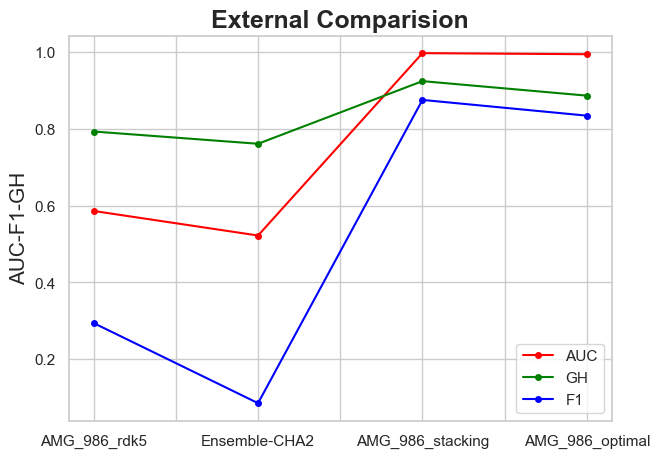

In [135]:
colors = ['red', 'green','blue']

ax = External.loc[:, External.columns[:3]].plot(label=External.columns[:3], color=colors[:3], figsize=(7, 5),marker='o',markersize=4,)
ax.set_ylabel(ylabel='AUC-F1-GH',fontsize = 15)
lines, labels = ax.get_legend_handles_labels()

ax.set_title("External Comparision",fontsize = 18, weight ='semibold')
ax.legend(lines, labels, loc=4)

plt.savefig("./External Comparision.png", dpi = 1000)

# 9. compare to pharmacophore model

In [69]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,  roc_curve, auc, precision_recall_curve,average_precision_score
from sklearn.metrics import accuracy_score
def CHA(df, active = 'Active', thresh = 0.5):
    data = df.copy()
    
    pred = []
    for i in data.columns:
        if "predict" in i:
            pred.append(i)
    
    col =  data[pred].shape[1]

    data['sum'] = data[pred].sum(axis =1)
    data['CHA'] = data['sum'] >= col*thresh
    data.drop(["sum"], axis =1, inplace = True)
    
    #print('ACC=',accuracy_score(data[active], data['CHA']))
    #print("Sensitivity=",recall_score(data[active], data['CHA']))
    #print("Specificity=",recall_score(data[active], data['CHA'], pos_label=0))
    #print("Precision=",precision_score(data[active], data['CHA']))
    #print("GH=",GH_score(data[active], data['CHA']))
    #display(data.head(5))
    
    
    
    score = []
    for i in data.columns:
        if "rescore" in i:
            score.append(i)
    data['CHA_rescore'] = data[score].mean(axis =1)
   
    
    ph4 = Validation.pharmacophore_validation(data = data, active = "Active", predict = "CHA", 
                                   scores = "CHA_rescore", model = "CHA", auc_thresh = 0.6)
    
    ph4.validation()
    #display(ph4.table.head(1))
    return data, ph4.table

In [85]:
cha3 = pd.read_csv("C:/Users/DELL/OneDrive - UMP/khoaluan/Voting-Stacking/Data-query4/CPS50-AUC6.csv").drop(['Unnamed: 0'],axis =1)
print("Number of model including predict and rescore in tập D-AUC6: ", cha3.shape[1] -1)

#split data
from sklearn.model_selection import train_test_split
X_train_cps50, X_test_cps50, y_train_cps50, y_test_cps50 = train_test_split(cha3.drop(['Active'], axis = 1), cha3.Active, test_size=0.2, random_state=42, stratify = cha3.Active)

#feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
model_cps50 = RandomForestClassifier(random_state=42)
model_cps50.fit(X_train_cps50, y_train_cps50)
select_cps50 =  SelectFromModel(model_cps50, prefit=True)

X_train_new_cps50 = select_cps50.transform(X_train_cps50.values)
X_test_new_cps50 = select_cps50.transform(X_test_cps50.values)
model_cps50 = XGBClassifier(random_state=42)
model_cps50.fit(X_train_new_cps50, y_train_cps50)

#Internal
print("********Internal********")

from sklearn.model_selection import cross_val_score

clf_cps50 = XGBClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_repeats = 3, n_splits=10, random_state=42)

auc_FS_cps50 = cross_val_score(clf_cps50, X_train_new_cps50, y_train_cps50, cv=cv, scoring ='roc_auc')
print(f'AUC = {round(np.mean(auc_FS_cps50),3)}±{round(np.std(auc_FS_cps50),3)}')

f1_FS_cps50 = cross_val_score(clf_cps50, X_train_new_cps50, y_train_cps50, cv=cv, scoring ='f1')
print(f'F1 = {round(np.mean(f1_FS_cps50),3)}±{round(np.std(f1_FS_cps50),3)}')

GH_FS_cps50 = cross_val_score(clf_cps50, X_train_new_cps50, y_train_cps50, cv=cv, scoring =GH_scoring)
print(f'GH = {round(np.mean(GH_FS_cps50),3)}±{round(np.std(GH_FS_cps50),3)}')

EF1_FS_cps50 = cross_val_score(clf_cps50, X_train_new_cps50, y_train_cps50, cv=cv, scoring =EF1_scoring)
print(f'GH = {round(np.mean(EF1_FS_cps50),3)}±{round(np.std(EF1_FS_cps50),3)}')
#Internal
print("********External********")

model_cps50 =XGBClassifier(random_state=42)
model_cps50.fit(X_train_new_cps50, y_train_cps50)
print(classification_report(y_test_cps50, model_cps50.predict(X_test_new_cps50),))

ext_f1_FS_cps50, ext_auc_FS_cps50, ext_gh_FS_cps50,ext_ef1_FS_cps50 = get_external(y_test_cps50, model_cps50.predict(X_test_new_cps50),
                                                                        model_cps50.predict_proba(X_test_new_cps50)[:, 1])
print('F1 =', ext_f1_FS_cps50)
print('AUC =', ext_auc_FS_cps50)
print('GH =', ext_gh_FS_cps50)
print('EF1 =', ext_ef1_FS_cps50)

Number of model including predict and rescore in tập D-AUC6:  98
********Internal********
AUC = 0.994±0.007
F1 = 0.907±0.033
GH = 0.953±0.017
GH = 50.07±0.211
********External********
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8863
         1.0       0.99      0.83      0.90       180

    accuracy                           1.00      9043
   macro avg       0.99      0.91      0.95      9043
weighted avg       1.00      1.00      1.00      9043

F1 = 0.9030303030303028
AUC = 0.990994396178871
GH = 0.9518370378728045
EF1 = 50.0


In [231]:
#AUC
idx = ['Similarity','Pharmacophore']
compare_AUC = []
compare_AUC.append(AUC_stacking['AMG 986'])
compare_AUC.append(auc_FS_cps50)
df_compare_AUC = pd.DataFrame(compare_AUC, index = idx).T
df_compare_AUC.head() 

,Similarity,Pharmacophore
0,0.998962,0.996074
1,0.996979,0.999361
2,0.995671,0.991569
3,0.990233,0.983937
4,0.990836,0.996877


Similarity vs. Pharmacophore: Custom statistical test, P_val:3.184e-01


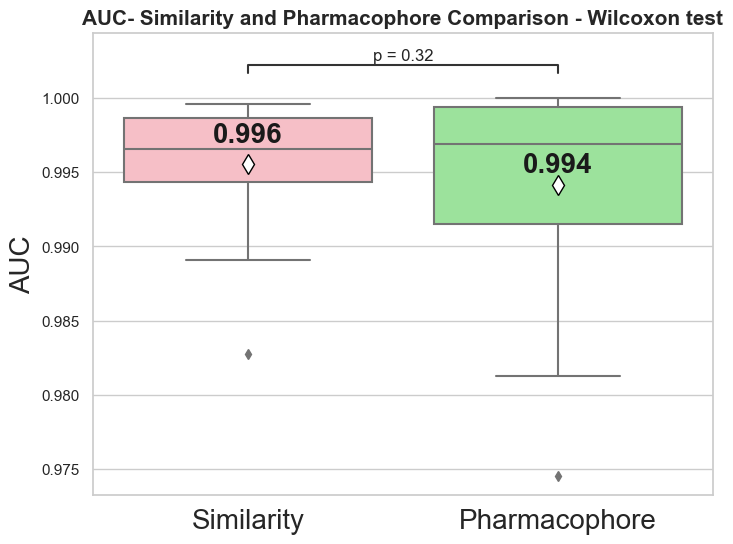

In [233]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_compare_AUC.reset_index(), id_vars=['index'], value_vars=df_compare_AUC.columns)
df_melt.columns = ['index', 'Model', 'AUC']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_compare_AUC['Similarity'].astype('float'), df_compare_AUC['Pharmacophore'].astype('float'), alternative="two-sided")]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'AUC',
    'palette': subcat_palette[1:]
}

pairs = [('Similarity', 'Pharmacophore')]

plt.figure(figsize = (8,6))
my_colors = {'Similarity': '#FFB6C1', 
             'Pharmacophore': 'lightgreen'}

ax = sns.boxplot(x='Model', y='AUC', data=df_melt , palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(df_compare_AUC.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =df_compare_AUC.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.001

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 20)



annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel('AUC', fontsize = 20)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_compare_AUC.columns, fontsize = 20)
ax.set_title("AUC- Similarity and Pharmacophore Comparison - Wilcoxon test",fontsize = 15, weight ='semibold')
plt.savefig("./Image/AUC- Similarity and Pharmacophore Comparison.png", dpi = 600)

In [234]:
#GH
idx = ['Similarity','Pharmacophore']
compare_GH = []
compare_GH.append(GH_stacking['AMG 986'])
compare_GH.append(GH_FS_cps50)
df_compare_GH = pd.DataFrame(compare_GH, index = idx).T
df_compare_GH 

,Similarity,Pharmacophore
0,0.909646,0.954861
1,0.888894,0.968750
2,0.941309,0.951389
3,0.904884,0.927083
4,0.893435,0.972222
5,0.909646,0.961806
6,0.889120,0.965278
7,0.933613,0.941309
8,0.884776,0.906243
9,0.913361,0.963542


In [235]:
df_compare_GH.mean()

Similarity       0.914977
Pharmacophore    0.952694
dtype: float64

Similarity vs. Pharmacophore: Custom statistical test, P_val:1.304e-08


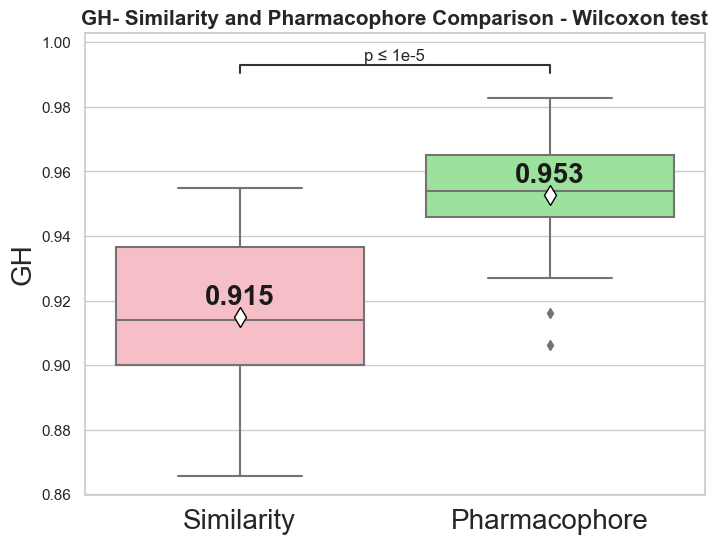

In [238]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_compare_GH.reset_index(), id_vars=['index'], value_vars=df_compare_GH.columns)
df_melt.columns = ['index', 'Model', 'GH']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_compare_GH['Similarity'].astype('float'), df_compare_GH['Pharmacophore'].astype('float'), alternative="two-sided")]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'GH',
    'palette': subcat_palette[1:]
}

pairs = [('Similarity', 'Pharmacophore')]

plt.figure(figsize = (8,6))
my_colors = {'Similarity': '#FFB6C1', 
             'Pharmacophore': 'lightgreen'}

ax = sns.boxplot(x='Model', y='GH', data=df_melt , palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(df_compare_GH.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =df_compare_GH.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.004

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 20)



annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel('GH', fontsize = 20)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_compare_GH.columns, fontsize = 20)
ax.set_title("GH- Similarity and Pharmacophore Comparison - Wilcoxon test",fontsize = 15, weight ='semibold')
plt.savefig("./Image/GH- Similarity and Pharmacophore Comparison.png", dpi = 600)

In [239]:
#F1
idx = ['Similarity','Pharmacophore']
compare_F1 = []
compare_F1.append(F1_stacking['AMG 986'])
compare_F1.append(f1_FS_cps50)
df_compare_F1 = pd.DataFrame(compare_F1, index = idx).T
df_compare_F1 

,Similarity,Pharmacophore
0,0.863636,0.900763
1,0.818898,0.933333
2,0.911765,0.892308
3,0.803279,0.829268
4,0.848485,0.941176
5,0.863636,0.917293
6,0.839695,0.925373
7,0.895522,0.911765
8,0.830769,0.834646
9,0.888889,0.941176


In [240]:
df_compare_F1.mean()

Similarity       0.863880
Pharmacophore    0.907156
dtype: float64

Similarity vs. Pharmacophore: Custom statistical test, P_val:5.718e-07


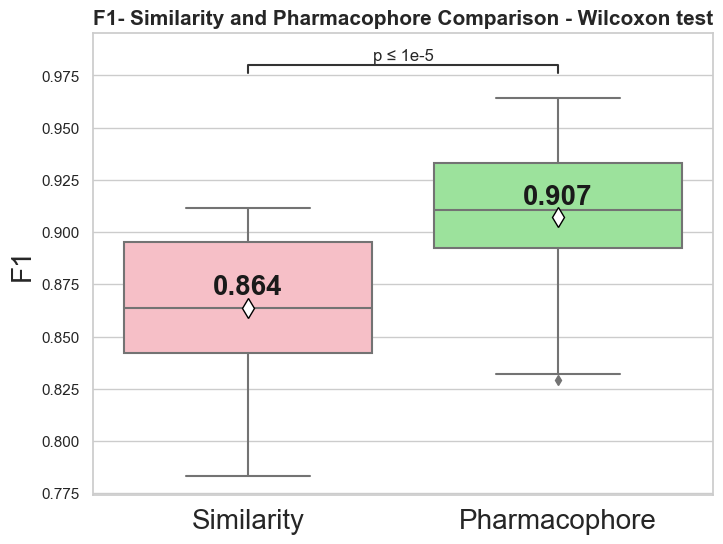

In [244]:
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu, normaltest, wilcoxon
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt

df_melt = pd.melt(df_compare_F1.reset_index(), id_vars=['index'], value_vars=df_compare_F1.columns)
df_melt.columns = ['index', 'Model', 'F1']
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)

stat_results = [wilcoxon(df_compare_F1['Similarity'].astype('float'), df_compare_F1['Pharmacophore'].astype('float'), alternative="two-sided")]

pvalues = [result.pvalue for result in stat_results]
plotting_parameters = {
    'data':    df_melt,
    'x':       'Model',
    'y':       'F1',
    'palette': subcat_palette[1:]
}

pairs = [('Similarity', 'Pharmacophore')]

plt.figure(figsize = (8,6))
my_colors = {'Similarity': '#FFB6C1', 
             'Pharmacophore': 'lightgreen'}

ax = sns.boxplot(x='Model', y='F1', data=df_melt , palette=my_colors, showmeans=True ,meanprops={"marker":"d",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"})

mean = round(df_compare_F1.mean(),3)
data = np.array(mean)   
ser = pd.Series(data, index =df_compare_F1.columns)

dict_columns = {'Mean':mean,}
df = pd.DataFrame(dict_columns)

vertical_offset = df["Mean"].median()*0.007

for xtick in ax.get_xticks():
    ax.text(xtick,ser[xtick]+ vertical_offset,ser[xtick], 
    horizontalalignment='center',color='k',weight='semibold', fontsize = 20)



annotator = Annotator(ax, pairs, **plotting_parameters)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(pvalues)

ax.set_ylabel('F1', fontsize = 20)
ax.set_xlabel(None)
ax.set_xticklabels(labels = df_compare_F1.columns, fontsize = 20)
ax.set_title("F1- Similarity and Pharmacophore Comparison - Wilcoxon test",fontsize = 15, weight ='semibold')
plt.savefig("./Image/F1- Similarity and Pharmacophore Comparison.png", dpi = 600)

In [92]:
#F1
idx = ['Similarity','Pharmacophore']
compare_EF1 = []
compare_EF1.append(EF1_stacking['AMG 986'])
compare_EF1.append(EF1_FS_cps50)
df_compare_EF1 = pd.DataFrame(compare_EF1, index = idx).T
df_compare_EF1 

,Similarity,Pharmacophore
0,50.000000,50.000000
1,50.000000,50.000000
2,50.000000,50.000000
3,50.000000,50.000000
4,50.000000,50.000000
5,50.000000,50.000000
6,50.000000,50.000000
7,50.000000,50.000000
8,50.000000,50.000000
9,50.704225,50.704225


In [93]:
df_compare_EF1.mean()

Similarity       50.070423
Pharmacophore    50.070423
dtype: float64